# Tests

## import

In [2]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itables import show
import pprint

import itertools
from multiprocess import Pool
import multiprocess
from multiprocess import Manager
from threading import Thread

import os
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map  # or thread_map
import numpy as np
from scipy.interpolate import interp1d
# from scipy.optimize import UnivariateSpline
from scipy.interpolate import interp1d, UnivariateSpline
import matplotlib.pyplot as plt
from astropy.io import fits
from FitsClass import FITSFile as myfits
from ObservationClass import ObservationManager as obsm

import specs as specs
from CCF import CCFclass

# Testing CCF

In [3]:
obs = obsm()
star_names = specs.star_names
star_name = star_names[0]
print(f'We use {star_name}')
star = obs.load_star_instance(star_name)

We use Brey  70


Data/Brey  70/epoch4/COMBINED/combined_bands.fits
Data loaded from Data/Brey  70/epoch4/COMBINED/combined_bands.fits


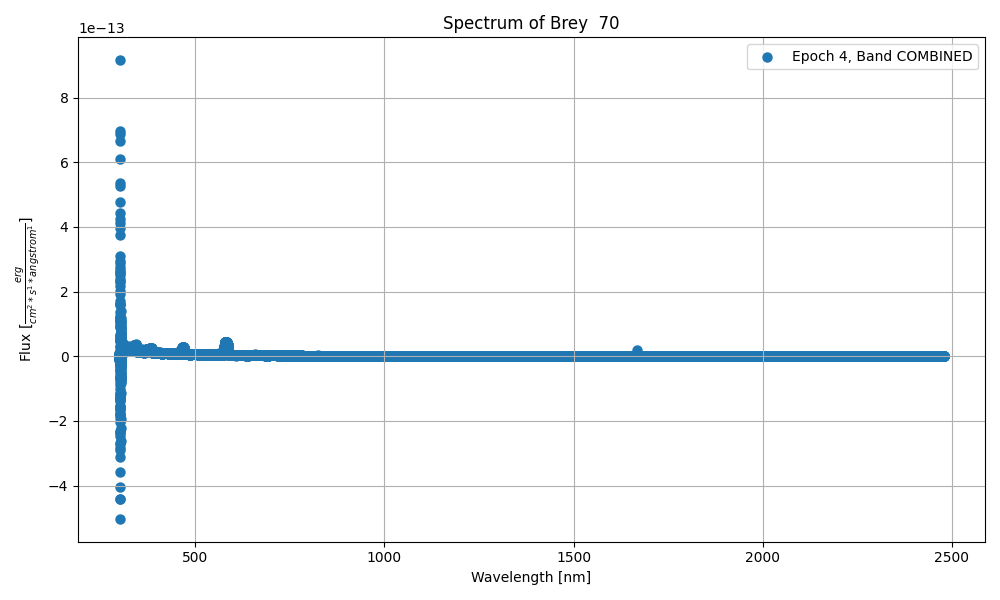

In [4]:
%matplotlib widget
star.plot_spectra(4,'COMBINED',scatter = True)

In [ ]:
CCF = CCFclass(

# testing classes

In [2]:
obs = obsm()
star_names = specs.star_names
star_name = star_names[16]
print(star_names)
print(f'Analysing star {star_name}')
star = obs.load_star_instance(star_name)

['Brey  70', 'Brey  83', 'HD  38029', 'HD  37248', 'Brey  95a', 'MNM2014 LMC195-1', 'HD  32125', 'HD  37026', 'HD 269818', 'HD  38448', 'HD  38030', 'HD  37680', 'Brey  58a', 'HD  32228', 'HD  32257', 'HD 269888', 'HD  36156', 'H2013 LMCe  584', 'L72 LH  41-1042', 'RMC 140', 'HD  32402', 'Brey  70a', 'Brey  16a', 'Brey  93', 'Brey  90a', 'HD 269891']
Analysing star HD  36156


### checking out differences in the combined areas flux. like if 

In [12]:
# from numba import njit, prange


waves = {}
flux_diffs = {}
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    waves_epoch = {}
    flux_diffs_epoch = {}
    for epoch in specs.obs_file_names[star_name]:
        epoch_num = int(epoch[-1])
        fits_file = star.load_observation(epoch_num,band = 'UVB')
        wave_uvb = fits_file.data['WAVE'][0] 
        flux_uvb = fits_file.data['FLUX'][0]
        fits_file = star.load_observation(epoch_num,band = 'VIS')
        wave_vis = fits_file.data['WAVE'][0]
        flux_vis = fits_file.data['FLUX'][0]
        fits_file = star.load_observation(epoch_num,band = 'NIR')
        wave_nir = fits_file.data['WAVE'][0]
        flux_nir = fits_file.data['FLUX'][0]

        wave_combine = np.concatenate((wave_uvb,wave_vis,wave_nir))
        flux_combine = np.concatenate((flux_uvb,flux_vis,flux_nir))
        sorted_indices = np.argsort(wave_combine)
        wave_combine_sorted = wave_combine[sorted_indices]
        flux_combine_sorted = flux_combine[sorted_indices]
        # Initialize lists for the final combined data
        wave_diff = []
        final_flux_diff = []
    
        n = len(wave_combine_sorted)
        i = 0
        while i < n:
            # Start of a new group (cluster of overlapping wavelengths)
            cluster_waves = [np.round(wave_combine_sorted[i],2)]
            cluster_fluxes = [flux_combine_sorted[i]]
            current_wave = np.round(wave_combine_sorted[i],2)
    
            i += 1
            # Collect all wavelengths within 0.02 nm of the current wavelength
            while i < n-1 and np.round(wave_combine_sorted[i]- current_wave,2)  < 0.02:
                cluster_waves.append(np.round(wave_combine_sorted[i],2))
                cluster_fluxes.append(flux_combine_sorted[i])
                i += 1
                break
    
            # Calculate the mean wavelength of the cluster
            mean_wave = np.mean(cluster_waves)
    
            # Compute combined flux and SNR for the cluster
            if len(cluster_fluxes) == 1:
                combined_flux = cluster_fluxes[0]
            else:
                # Weights are proportional to SNR squared
                flux_diff = np.absolute(cluster_fluxes[1]-cluster_fluxes[0])
                wave_diff.append(mean_wave)
    
        # Convert lists to numpy arrays
        wave_diff = np.array(wave_diff)
        final_flux_diff = np.array(final_flux_diff)
        waves_epoch[f'epoch{epoch_num}'] = wave_diff
        flux_diffs_epoch[f'epoch{epoch_num}'] = flux_diffs
    waves[star_name] = waves_epoch
    flux_diffs[star_name] = flux_diffs_epoch

# diffs(specs.star_names)

Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Data loaded from Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
Data loaded from Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data loaded from Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data/Brey  70/epoch2/UVB/ADP.2020-12-07T08_55_14.124.fits
Data loaded from Data/Brey  70/epoch2/UVB/ADP.2020-12-07T08_55_14.124.fits
Data/Brey  70/epoch2/VIS/ADP.2020-12-07T08_55_14.279.fits
Data loaded from Data/Brey  70/epoch2/VIS/ADP.2020-12-07T08_55_14.279.fits
Data/Brey  70/epoch2/NIR/ADP.2020-12-07T08_55_14.173.fits
Data loaded from Data/Brey  70/epoch2/NIR/ADP.2020-12-07T08_55_14.173.fits
Data/Brey  70/epoch3/UVB/ADP.2021-09-01T08_13_27.941.fits
Data loaded from Data/Brey  70/epoch3/UVB/ADP.2021-09-01T08_13_27.941.fits
Data/Brey  70/epoch3/VIS/ADP.2021-09-01T08_13_27.907.fits
Data loaded

In [15]:
import numpy as np
import re

# Assuming 'specs' and 'obs' are predefined modules/classes as per your code.
# Replace 'specs.star_names' and 'specs.obs_file_names' with your actual data.

waves = {}        # Dictionary to store wavelengths for each star and epoch
flux_diffs = {}   # Dictionary to store flux differences for each star and epoch
diff_rel_size = {}

for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    waves_epoch = {}
    flux_diffs_epoch = {}
    diff_rel_size_epoch = {}
    for epoch in specs.obs_file_names[star_name]:
        # Extract epoch number from the epoch string
        epoch_num = int(re.findall(r'\d+', epoch)[0])
        
        # Load observations for each band
        try:
            fits_file_uvb = star.load_observation(epoch_num, band='UVB')
            wave_uvb = fits_file_uvb.data['WAVE'][0]
            flux_uvb = fits_file_uvb.data['FLUX'][0]
        except FileNotFoundError:
            print(f"UVB data not found for {star_name} epoch {epoch_num}")
            continue
        
        try:
            fits_file_vis = star.load_observation(epoch_num, band='VIS')
            wave_vis = fits_file_vis.data['WAVE'][0]
            flux_vis = fits_file_vis.data['FLUX'][0]
        except FileNotFoundError:
            print(f"VIS data not found for {star_name} epoch {epoch_num}")
            continue
        
        try:
            fits_file_nir = star.load_observation(epoch_num, band='NIR')
            wave_nir = fits_file_nir.data['WAVE'][0]
            flux_nir = fits_file_nir.data['FLUX'][0]
        except FileNotFoundError:
            print(f"NIR data not found for {star_name} epoch {epoch_num}")
            continue
            
        try:
            fits_file_combined = star.load_observation(epoch_num, band='COMBINED')
            wave_combined= fits_file_combined.data['WAVE'][0]
            flux_combined = fits_file_combined.data['FLUX'][0]
        except FileNotFoundError:
            print(f"COMBINED data not found for {star_name} epoch {epoch_num}")
            continue
        
        batch_size = 2
        
        # Initialize lists to store mean wavelengths and flux differences
        mean_wavelengths_epoch = []
        flux_diffs_epoch_list = []
        diff_rel_size_list = []
        # --- Overlapping region between UVB and VIS ---
        # Find overlapping wavelengths by matching wavelengths in both bands
        overlap_waves_uvb_vis = np.intersect1d(np.round(wave_uvb, 3), np.round(wave_vis, 3))
        
        if overlap_waves_uvb_vis.size > 0:
            # For each overlapping wavelength, get fluxes from both bands
            num_points = len(overlap_waves_uvb_vis)
            num_batches = num_points // batch_size
            for i in range(num_batches):
                start_idx = i * batch_size 
                end_idx = start_idx + batch_size
                wave_batch = overlap_waves_uvb_vis[start_idx:end_idx]
                
                # Get indices of these wavelengths in the original arrays
                uvb_indices = np.isin(np.round(wave_uvb, 3), wave_batch)
                vis_indices = np.isin(np.round(wave_vis, 3), wave_batch)
                combined_indices = np.isin(np.round(wave_combined, 3), wave_batch)
                
                flux_uvb_batch = flux_uvb[uvb_indices]
                flux_vis_batch = flux_vis[vis_indices]
                flux_combined_batch = flux_combined[combined_indices]
                
                if len(flux_uvb_batch) == 0 or len(flux_vis_batch) == 0:
                    continue  # Skip if data is missing in any band
                
                # Calculate mean fluxes
                mean_flux_uvb = np.mean(flux_uvb_batch)
                mean_flux_vis = np.mean(flux_vis_batch)
                mean_flux_combined = np.mean(flux_combined_batch)
                # Calculate the difference
                flux_diff = np.absolute(mean_flux_vis - mean_flux_uvb)
                # Save the mean wavelength and flux difference
                mean_wavelength = np.mean(wave_batch)
                mean_wavelengths_epoch.append(mean_wavelength)
                flux_diffs_epoch_list.append(flux_diff)
                diff_rel_size_list.append(flux_diff/mean_flux_combined)
                
        
        # --- Overlapping region between VIS and NIR ---
        overlap_waves_vis_nir = np.intersect1d(np.round(wave_vis, 3), np.round(wave_nir, 3))
        
        if overlap_waves_vis_nir.size > 0:
            num_points = len(overlap_waves_vis_nir)
            num_batches = num_points // batch_size
            for i in range(num_batches):
                start_idx = i * batch_size
                end_idx = start_idx + batch_size
                wave_batch = overlap_waves_vis_nir[start_idx:end_idx]
                
                vis_indices = np.isin(np.round(wave_vis, 3), wave_batch)
                nir_indices = np.isin(np.round(wave_nir, 3), wave_batch)
                combined_indices = np.isin(np.round(wave_combined, 3), wave_batch)
                
                flux_vis_batch = flux_vis[vis_indices]
                flux_nir_batch = flux_nir[nir_indices]
                flux_combined_batch = flux_combined[combined_indices]
                
                if len(flux_vis_batch) == 0 or len(flux_nir_batch) == 0:
                    continue  # Skip if data is missing in any band
                
                # Calculate mean fluxes
                mean_flux_vis = np.mean(flux_vis_batch)
                mean_flux_nir = np.mean(flux_nir_batch)
                mean_flux_combined = np.mean(flux_combined_batch)
                # Calculate the difference
                flux_diff = np.absolute(mean_flux_nir - mean_flux_vis)
                # Save the mean wavelength and flux difference
                mean_wavelength = np.mean(wave_batch)
                mean_wavelengths_epoch.append(mean_wavelength)
                flux_diffs_epoch_list.append(flux_diff)
                diff_rel_size_list.append(flux_diff/mean_flux_combined)
        
        # After processing both overlapping regions, save the data
        if mean_wavelengths_epoch and flux_diffs_epoch_list:
            # Convert to arrays
            mean_wavelengths_epoch = np.array(mean_wavelengths_epoch)
            flux_diffs_epoch_list = np.array(flux_diffs_epoch_list)
            diff_rel_size_list = np.array(diff_rel_size_list)
            
            # Sort the data by mean_wavelength
            sorted_indices = np.argsort(mean_wavelengths_epoch)
            mean_wavelengths_epoch = mean_wavelengths_epoch[sorted_indices]
            flux_diffs_epoch_list = flux_diffs_epoch_list[sorted_indices]
            diff_rel_size_list = diff_rel_size_list[sorted_indices]
            
            # Save to dictionaries
            key = f'epoch{epoch_num}'
            waves_epoch[key] = mean_wavelengths_epoch
            flux_diffs_epoch[key] = flux_diffs_epoch_list
            diff_rel_size_epoch[key] = diff_rel_size_list
        else:
            print(f"No overlapping regions found for {star_name} epoch {epoch_num}")
    
    waves[star_name] = waves_epoch
    flux_diffs[star_name] = flux_diffs_epoch
    diff_rel_size[star_name] = diff_rel_size_epoch


Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Data loaded from Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
Data loaded from Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data loaded from Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data/Brey  70/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/Brey  70/epoch1/COMBINED/combined_bands.fits
Data/Brey  70/epoch2/UVB/ADP.2020-12-07T08_55_14.124.fits
Data loaded from Data/Brey  70/epoch2/UVB/ADP.2020-12-07T08_55_14.124.fits
Data/Brey  70/epoch2/VIS/ADP.2020-12-07T08_55_14.279.fits
Data loaded from Data/Brey  70/epoch2/VIS/ADP.2020-12-07T08_55_14.279.fits
Data/Brey  70/epoch2/NIR/ADP.2020-12-07T08_55_14.173.fits
Data loaded from Data/Brey  70/epoch2/NIR/ADP.2020-12-07T08_55_14.173.fits
Data/Brey  70/epoch2/COMBINED/combined_bands.fits
Data loaded from Data/Brey  70/epoc

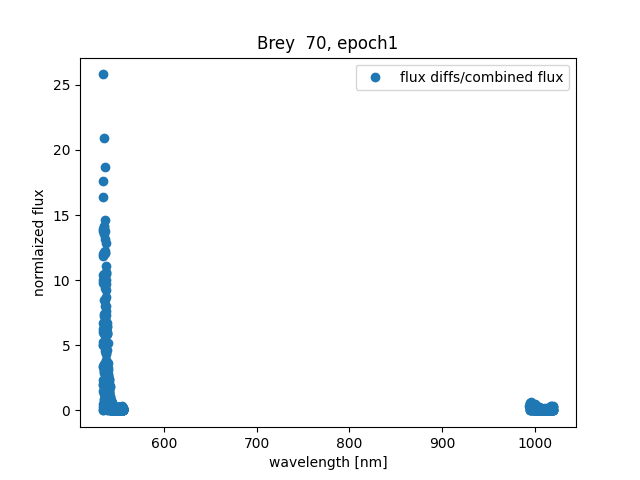

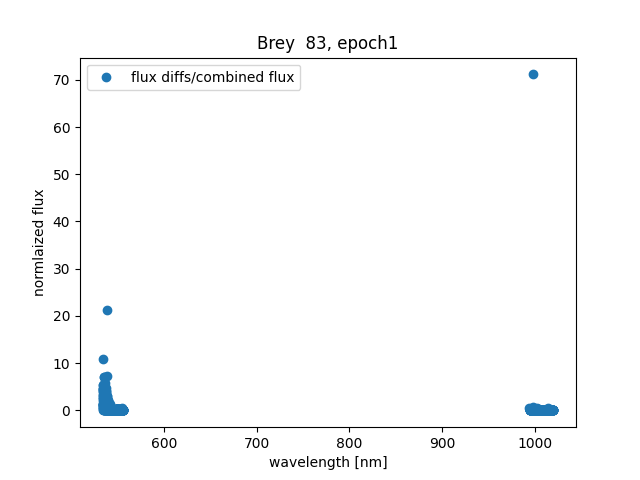

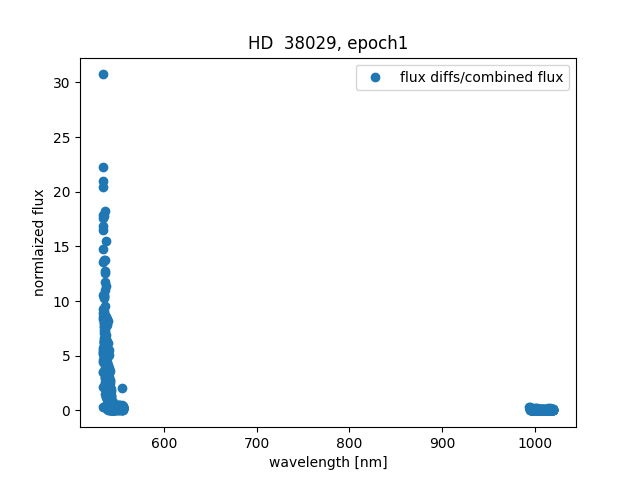

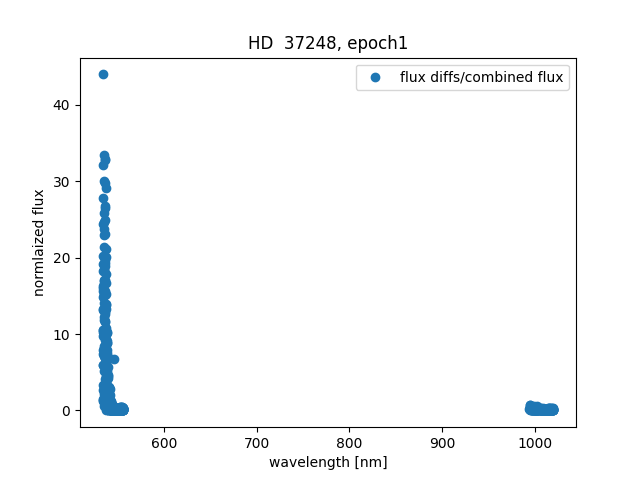

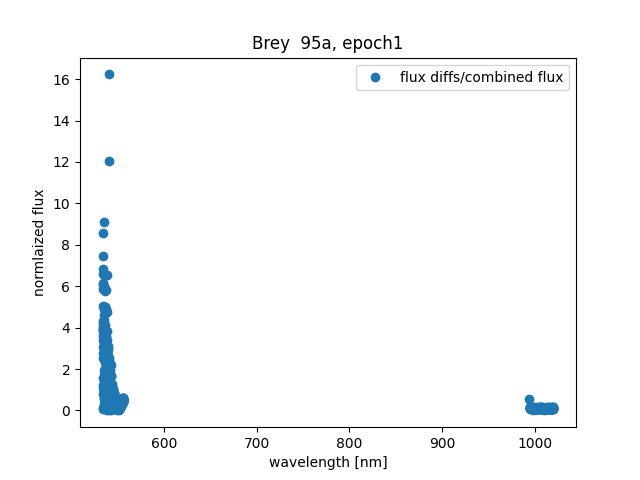

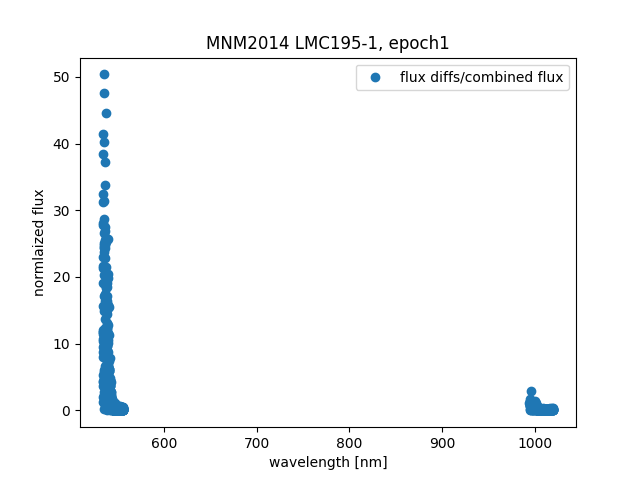

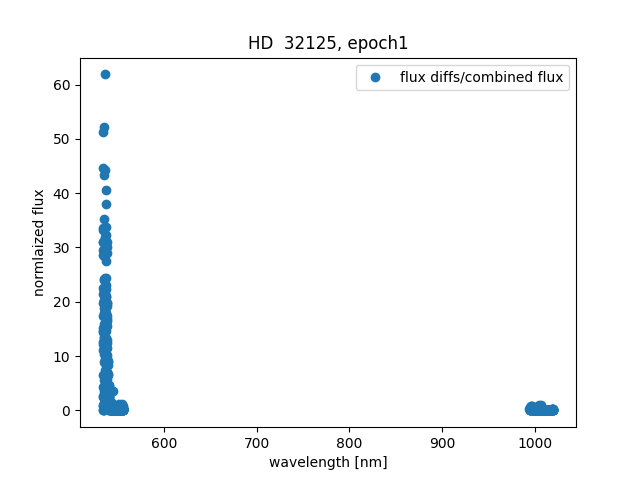

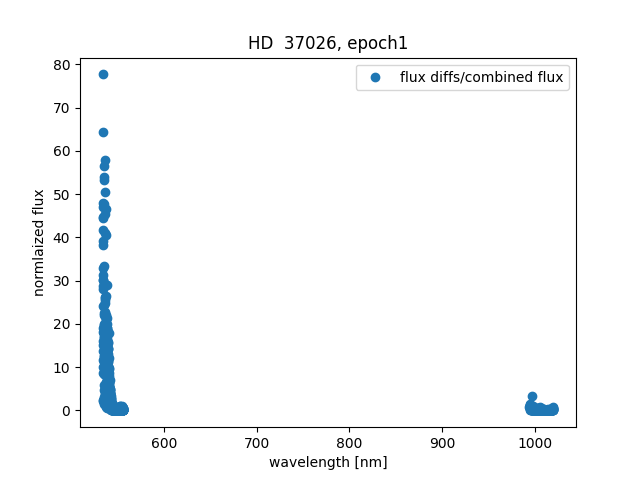

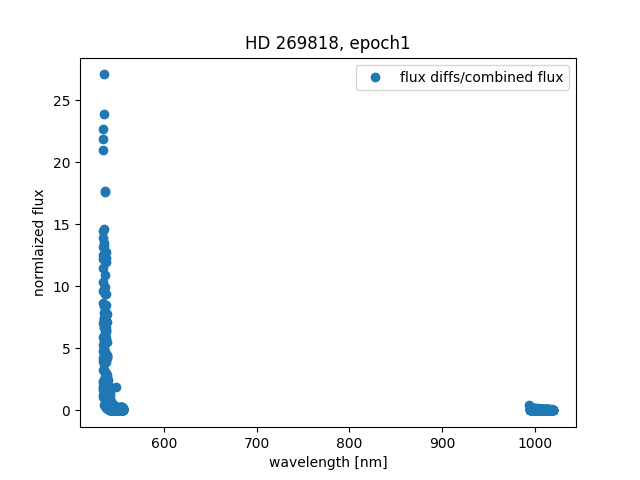

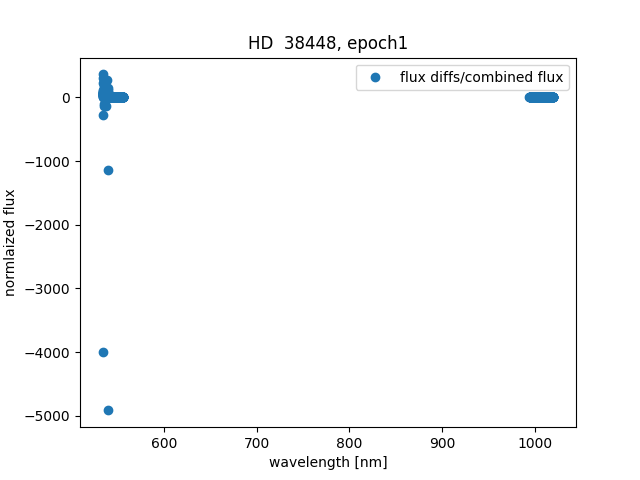

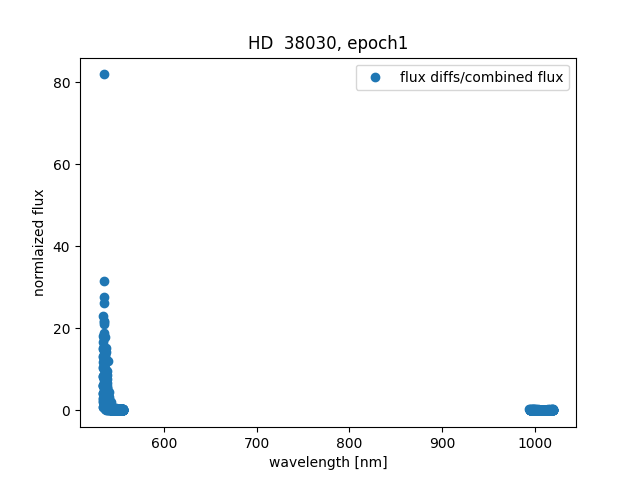

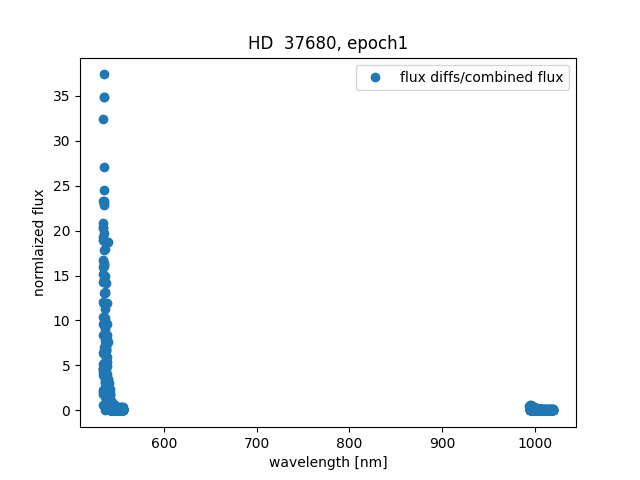

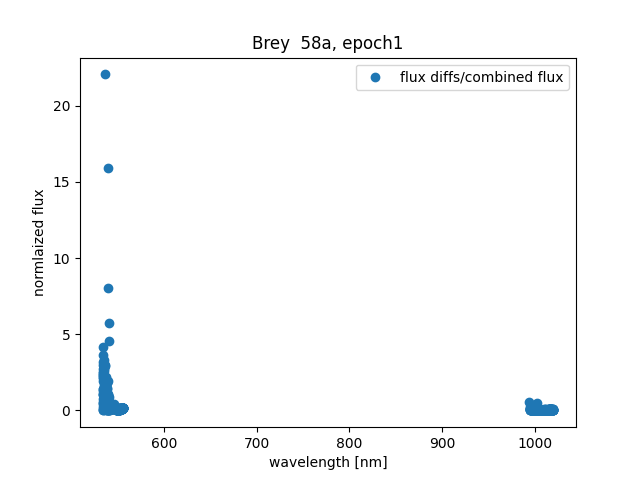

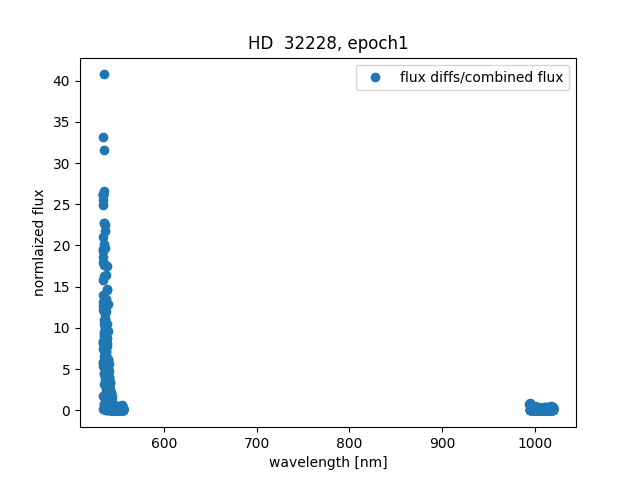

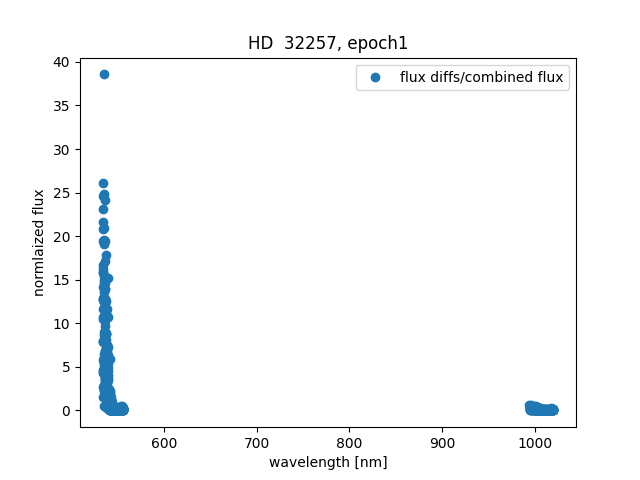

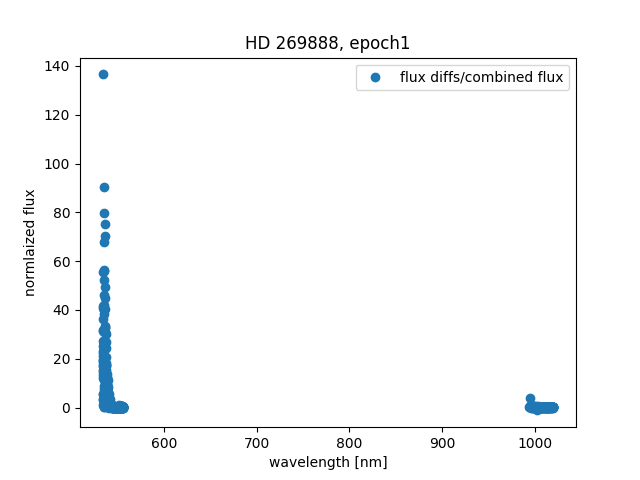

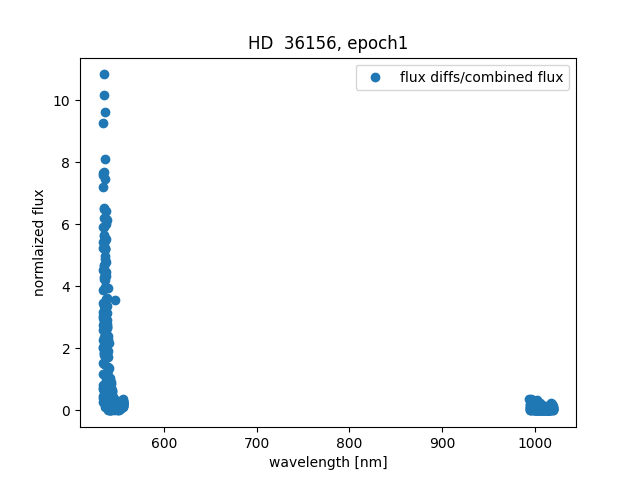

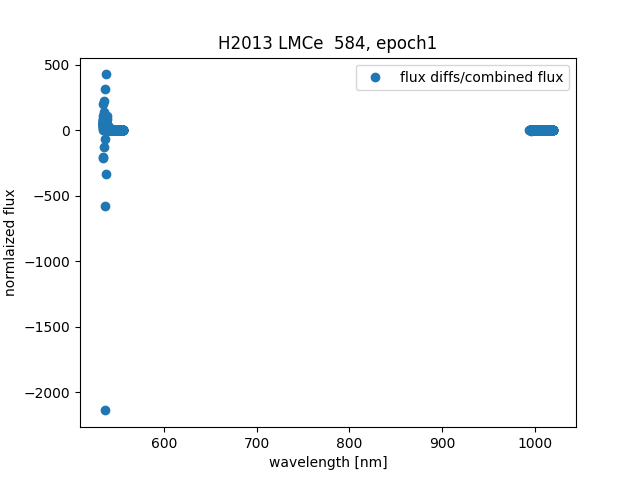

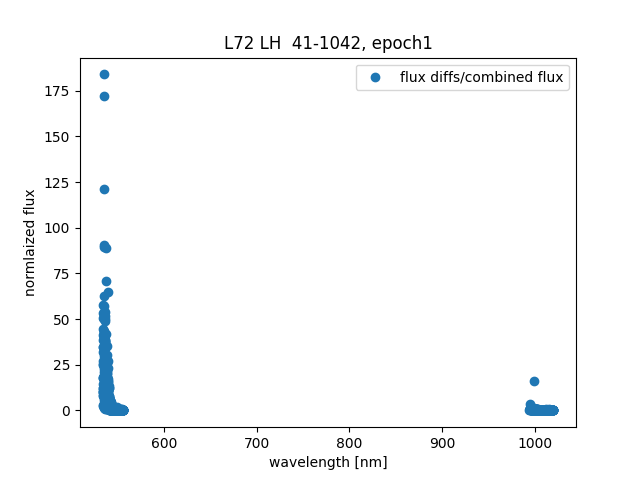

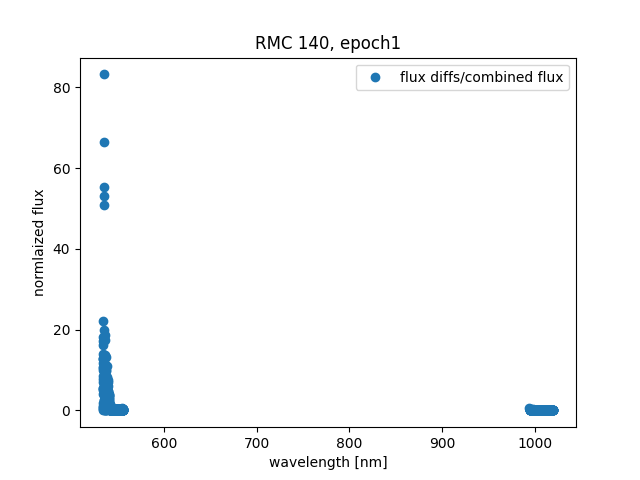

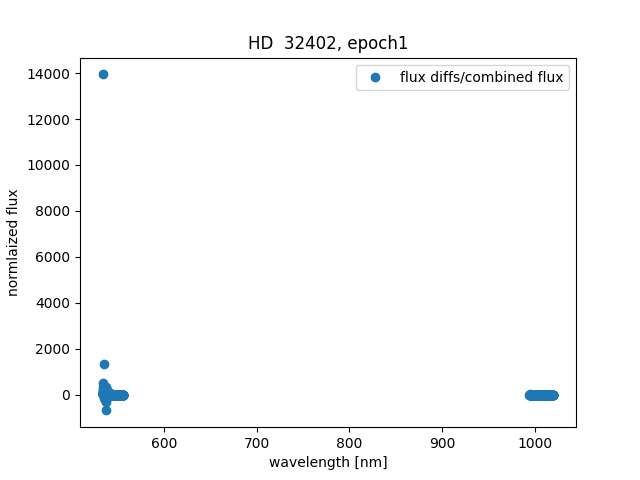

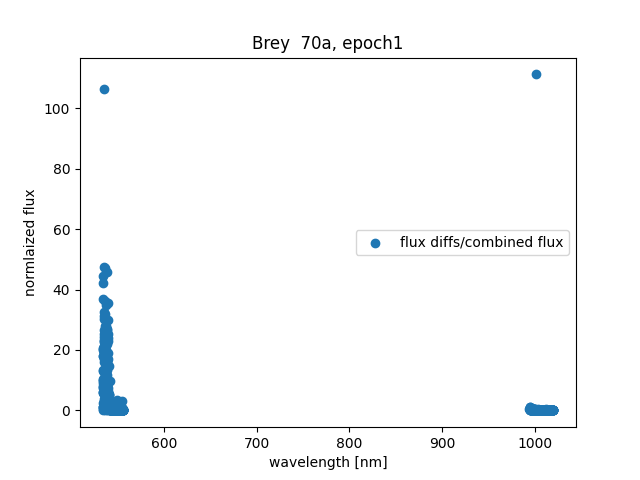

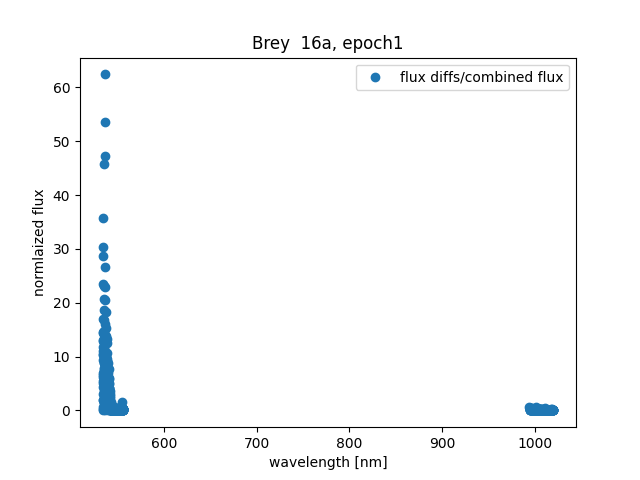

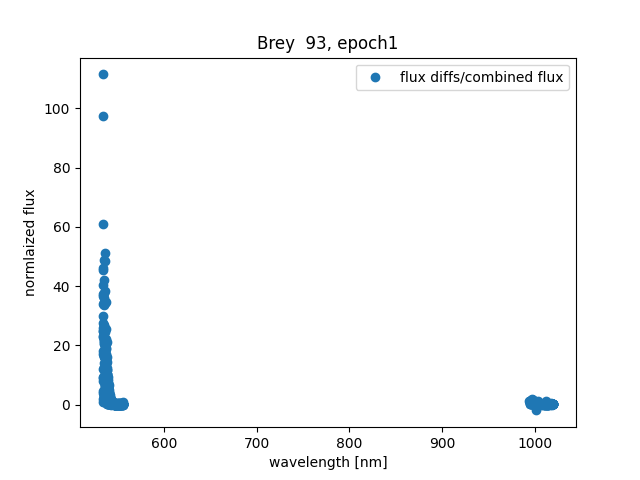

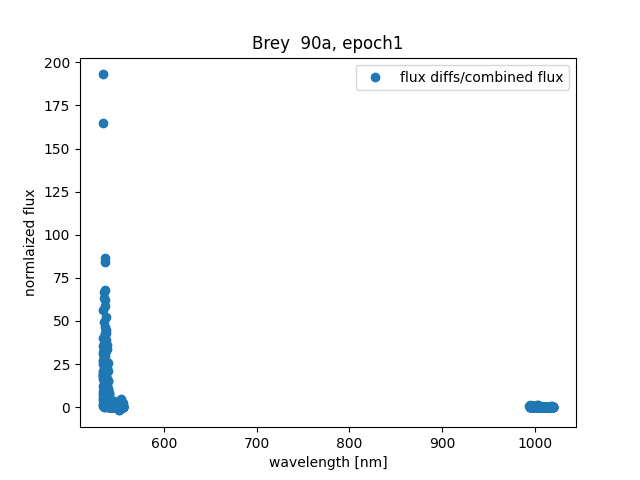

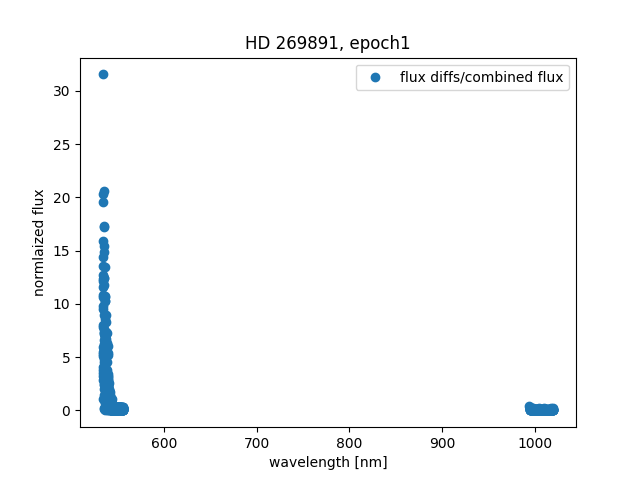

In [16]:
%matplotlib widget
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    for epoch in specs.obs_file_names[star_name]:
        epoch_num = int(epoch[-1])
        wave = waves[star_name][f'epoch{epoch_num}']
        # flux_diff = 1/(diff_rel_size[star_name][f'epoch{epoch_num}'])*flux_diffs[star_name][f'epoch{epoch_num}']
        flux_diff = diff_rel_size[star_name][f'epoch{epoch_num}']
        plt.figure()
        # star.plot_spectra(epoch_num,'COMBINED')
        plt.scatter(wave, flux_diff, label = 'flux diffs/combined flux')
        plt.xlabel('wavelength [nm]')
        plt.ylabel('normlaized flux')
        plt.title(f'{star_name}, epoch{epoch_num}')
        plt.legend()
        plt.show()
        break

Data/Brey  70/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/Brey  70/epoch1/COMBINED/combined_bands.fits


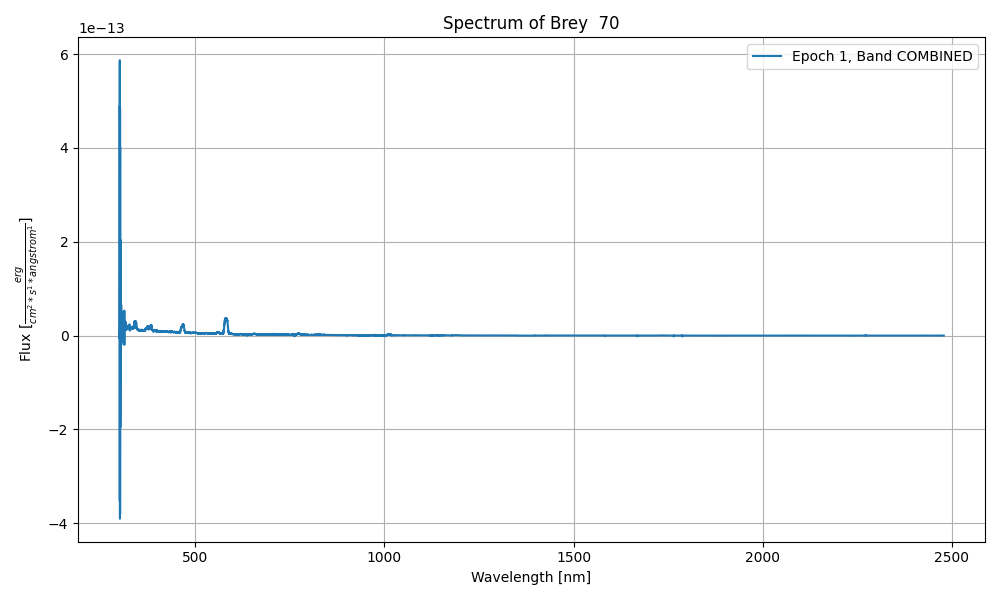

Data/Brey  83/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/Brey  83/epoch1/COMBINED/combined_bands.fits


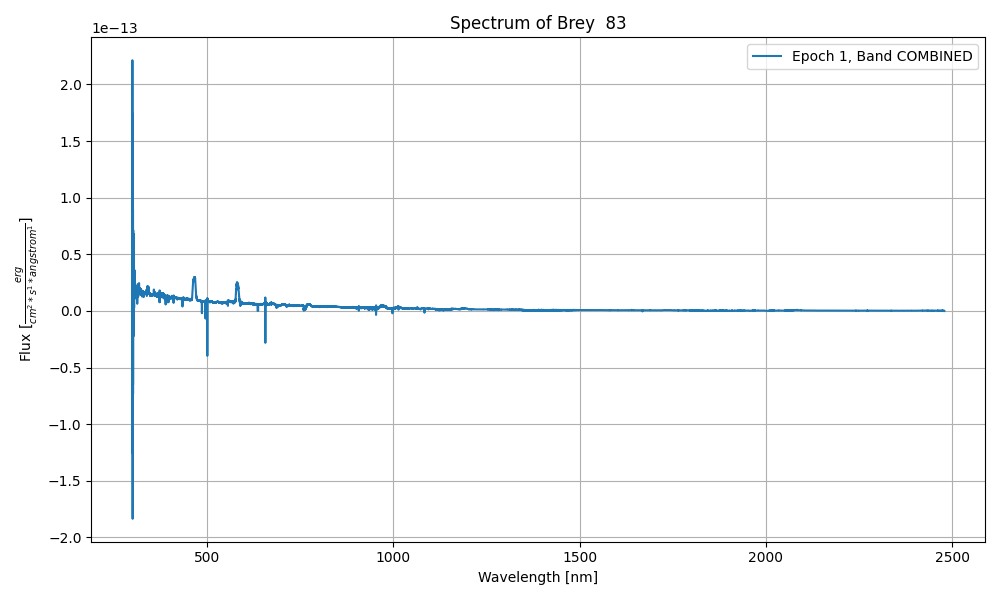

Data/HD  38029/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD  38029/epoch1/COMBINED/combined_bands.fits


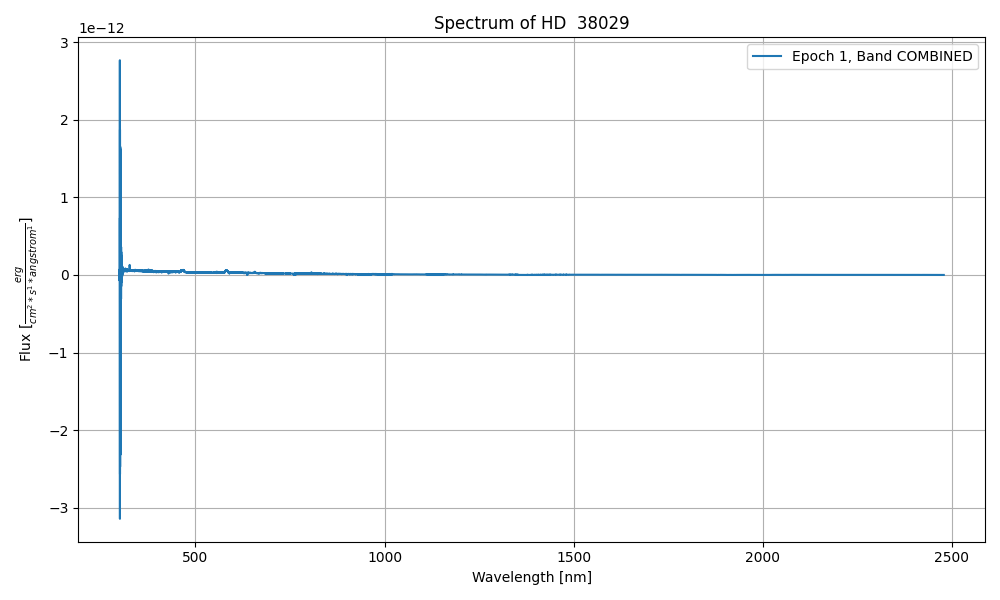

Data/HD  37248/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD  37248/epoch1/COMBINED/combined_bands.fits


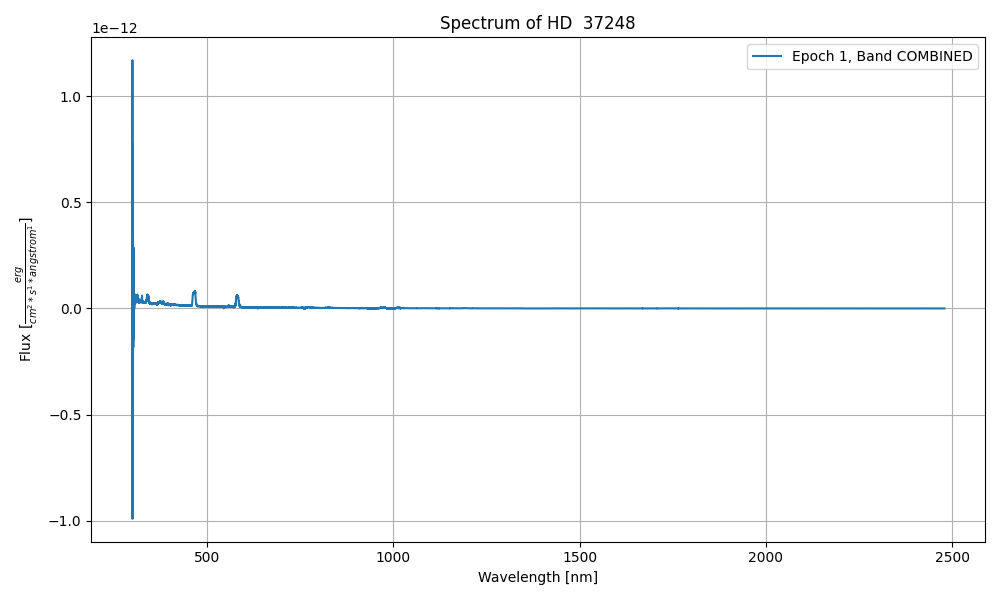

Data/Brey  95a/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/Brey  95a/epoch1/COMBINED/combined_bands.fits


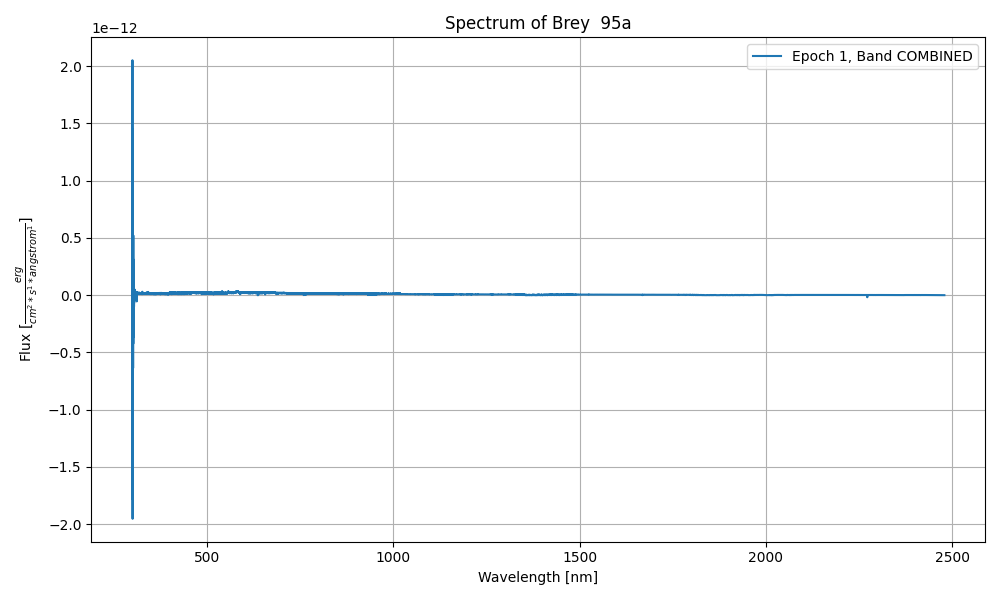

Data/MNM2014 LMC195-1/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/MNM2014 LMC195-1/epoch1/COMBINED/combined_bands.fits


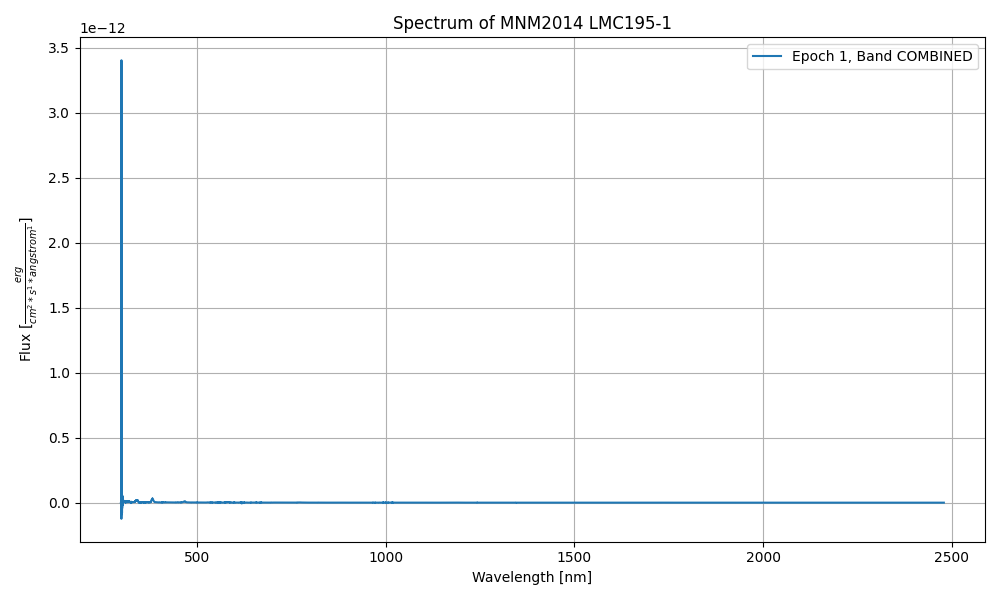

Data/HD  32125/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD  32125/epoch1/COMBINED/combined_bands.fits


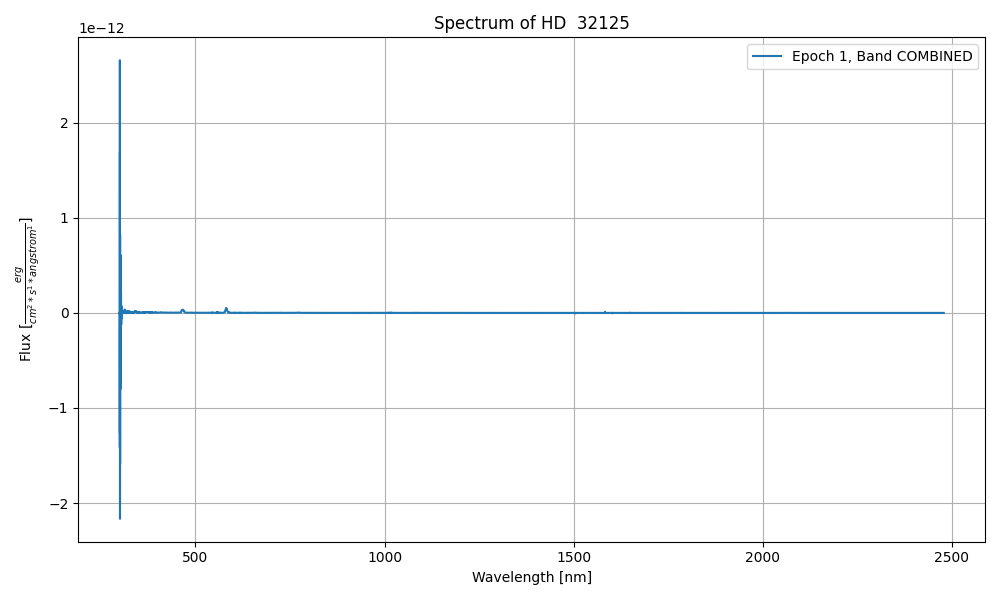

Data/HD  37026/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD  37026/epoch1/COMBINED/combined_bands.fits


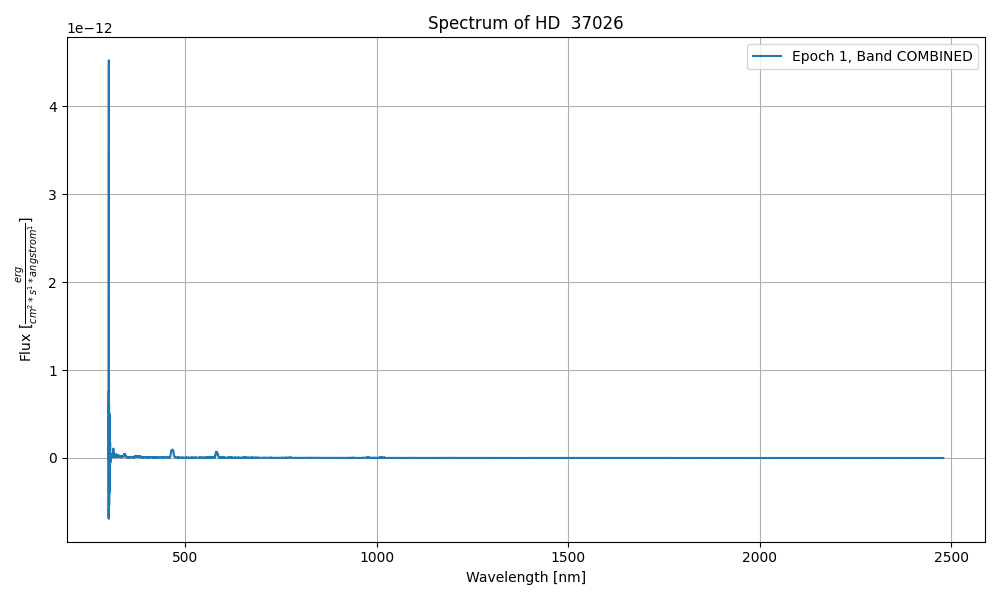

Data/HD 269818/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD 269818/epoch1/COMBINED/combined_bands.fits


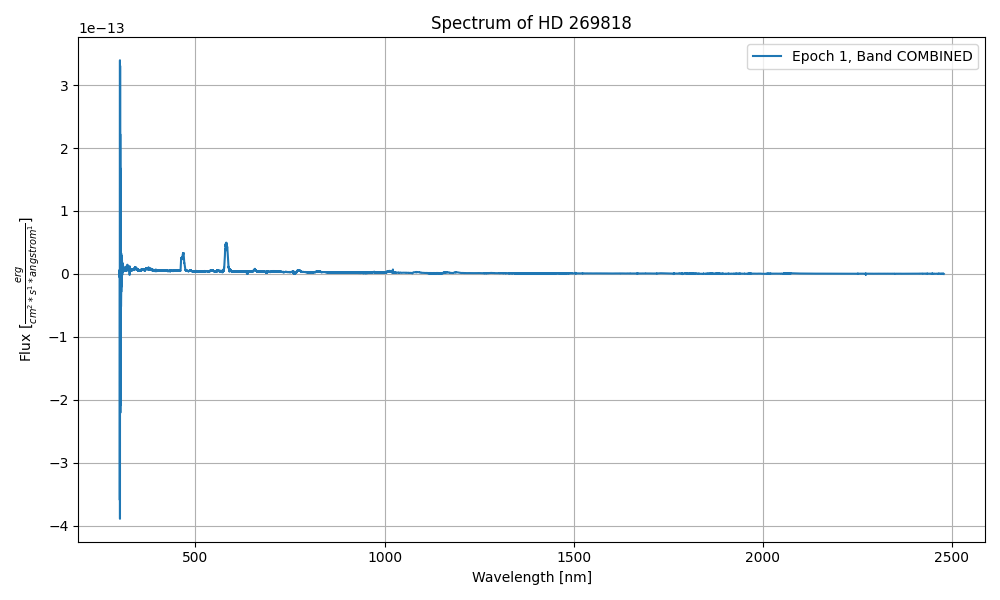

Data/HD  38448/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD  38448/epoch1/COMBINED/combined_bands.fits


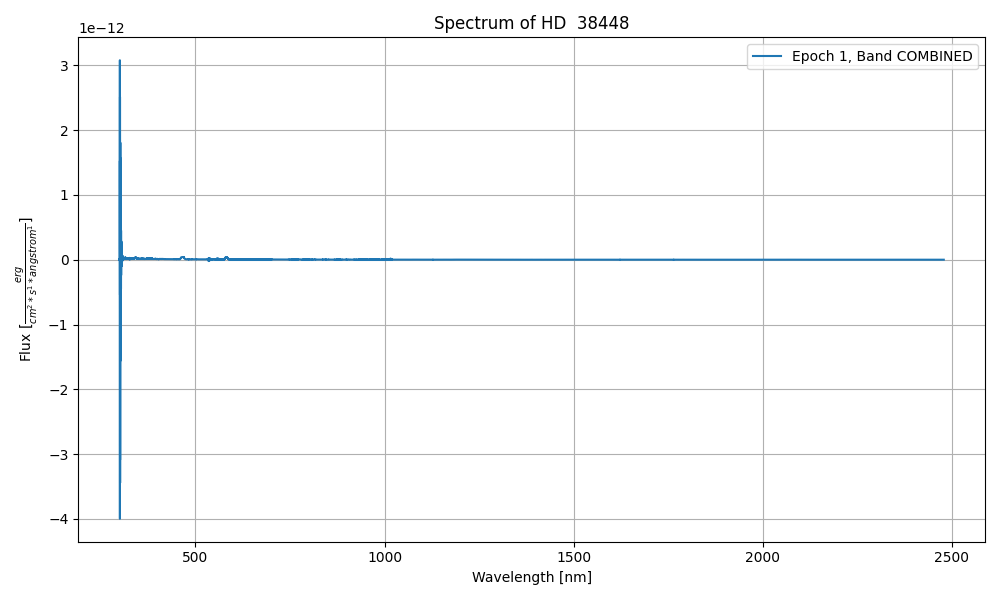

Data/HD  38030/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD  38030/epoch1/COMBINED/combined_bands.fits


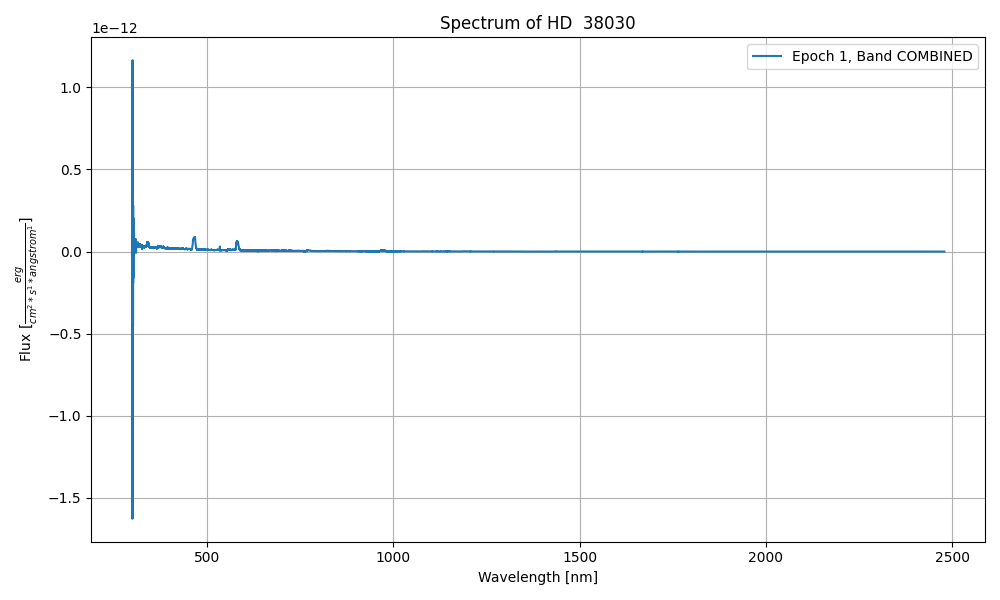

Data/HD  37680/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD  37680/epoch1/COMBINED/combined_bands.fits


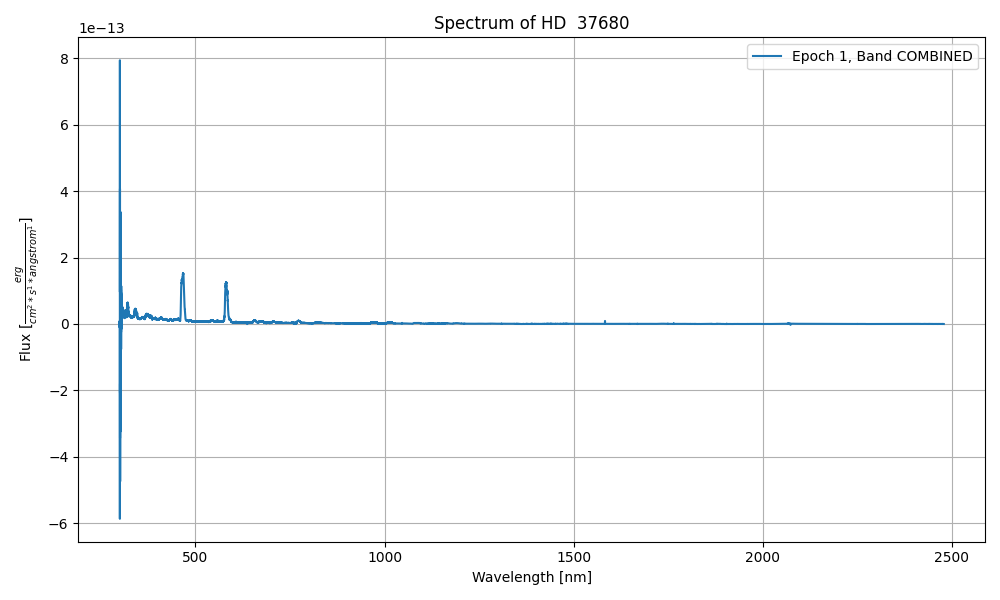

Data/Brey  58a/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/Brey  58a/epoch1/COMBINED/combined_bands.fits


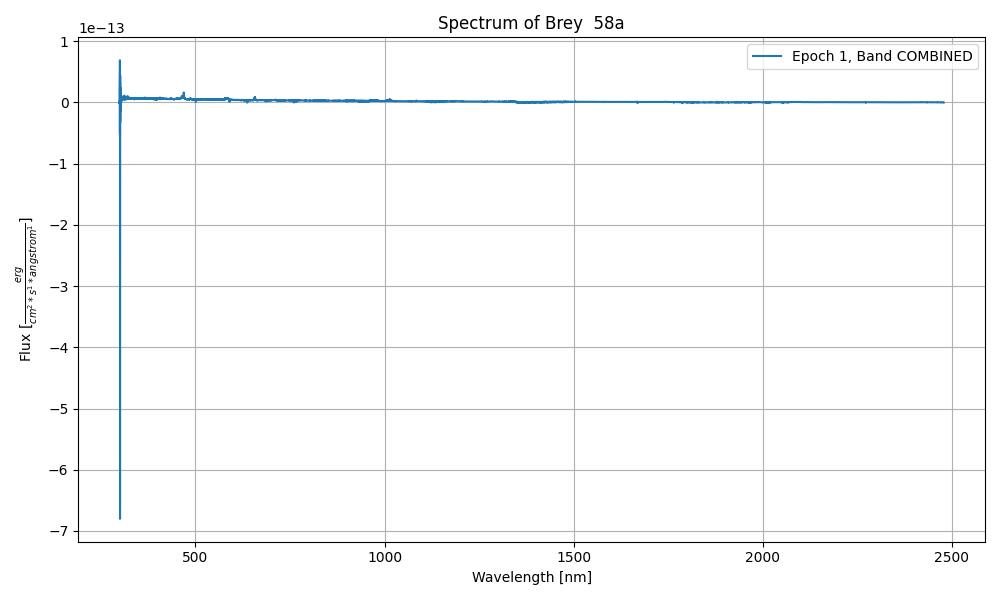

Data/HD  32228/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD  32228/epoch1/COMBINED/combined_bands.fits


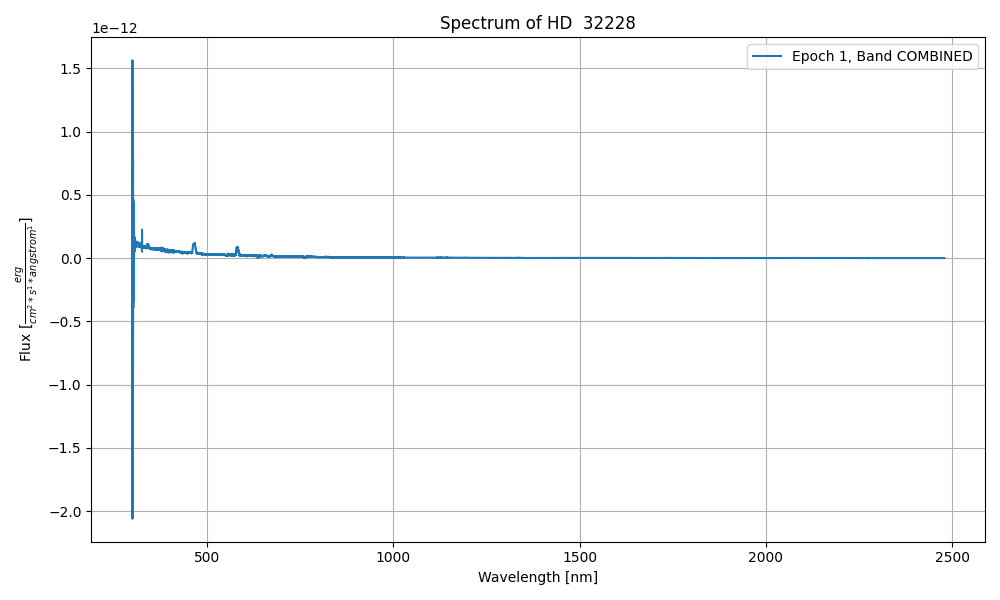

Data/HD  32257/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD  32257/epoch1/COMBINED/combined_bands.fits


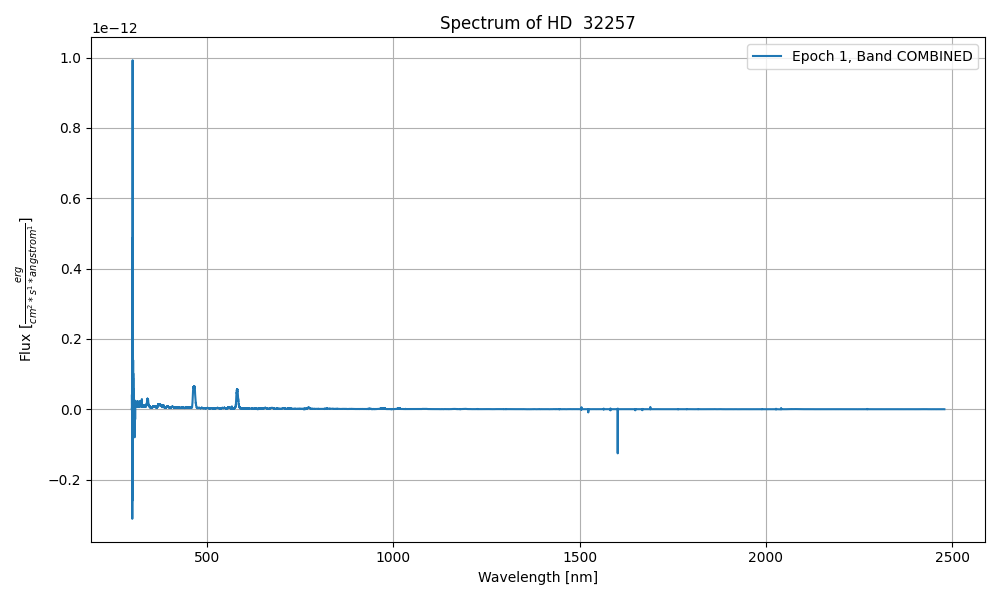

Data/HD 269888/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD 269888/epoch1/COMBINED/combined_bands.fits


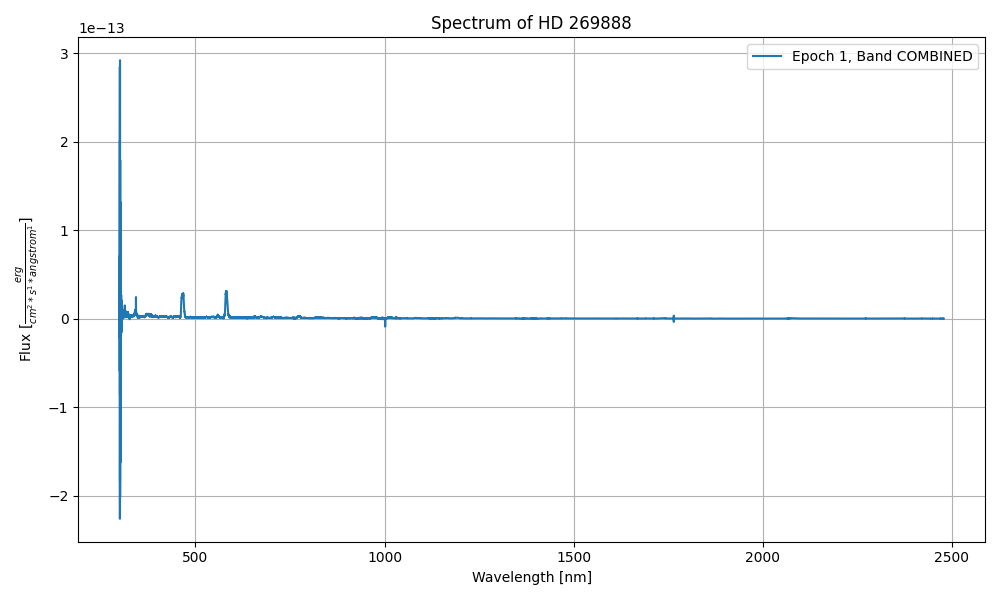

Data/HD  36156/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD  36156/epoch1/COMBINED/combined_bands.fits


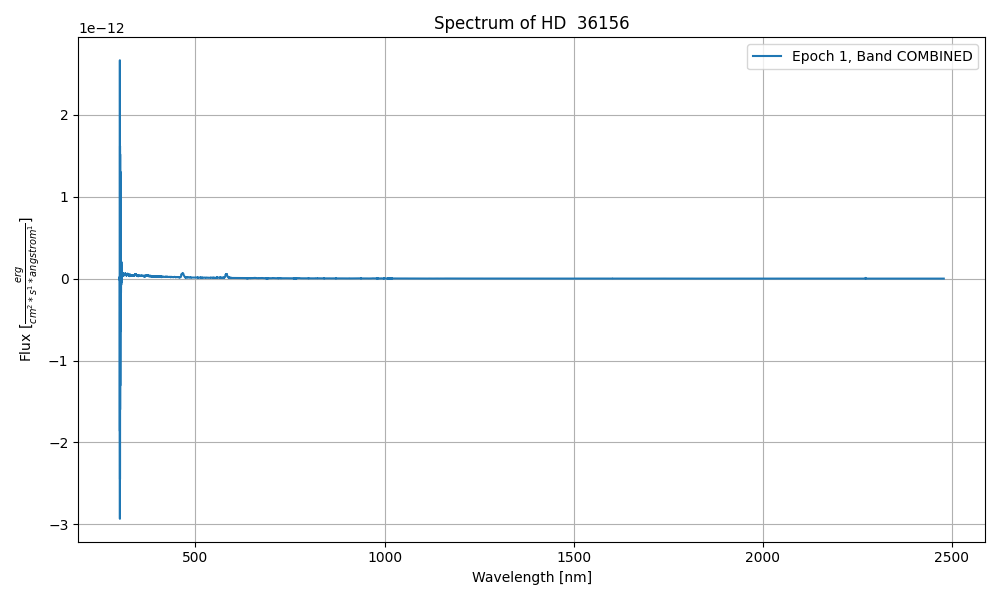

Data/H2013 LMCe  584/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/H2013 LMCe  584/epoch1/COMBINED/combined_bands.fits


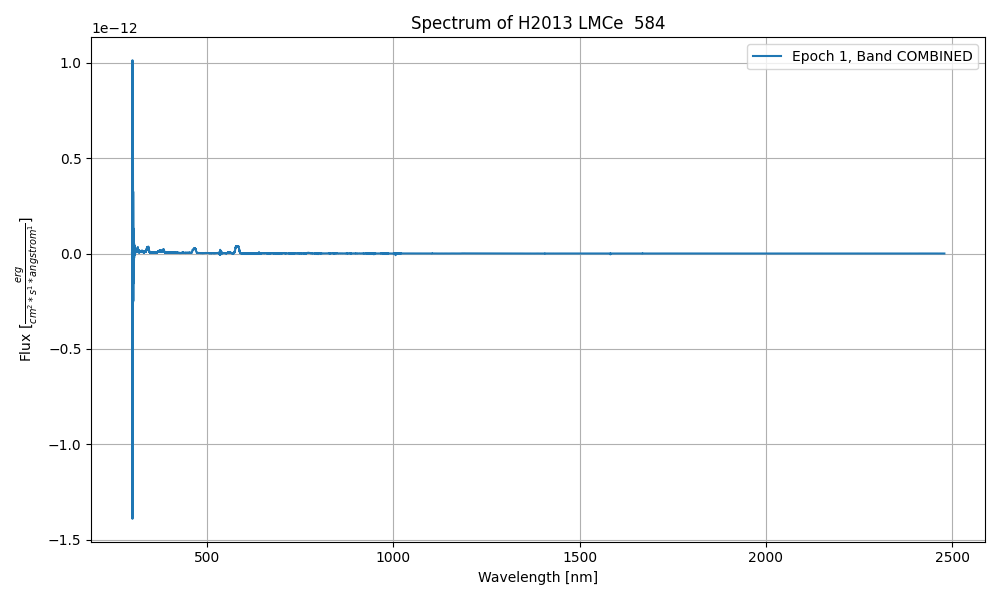

Data/L72 LH  41-1042/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/L72 LH  41-1042/epoch1/COMBINED/combined_bands.fits


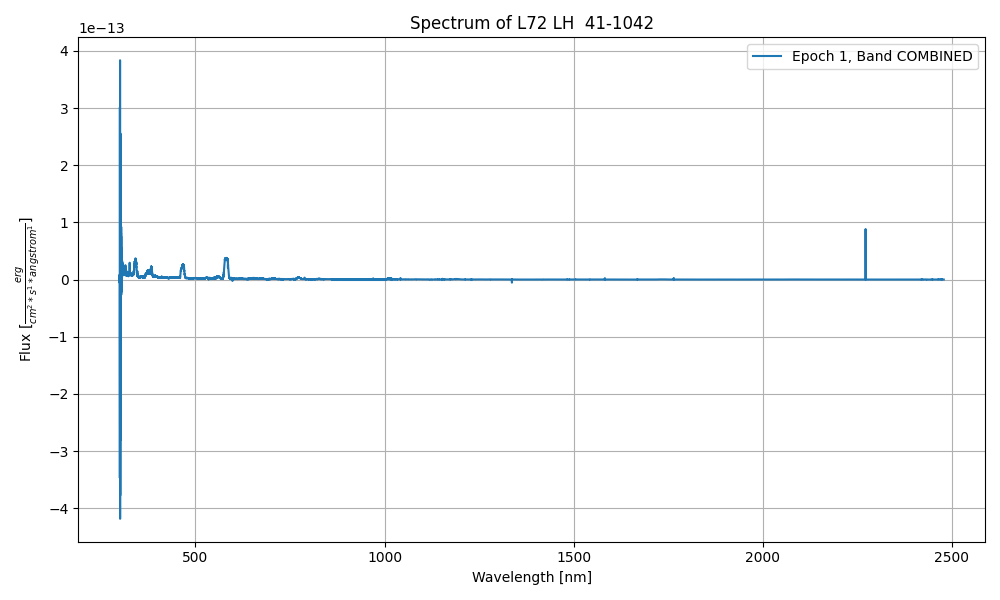

Data/RMC 140/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/RMC 140/epoch1/COMBINED/combined_bands.fits


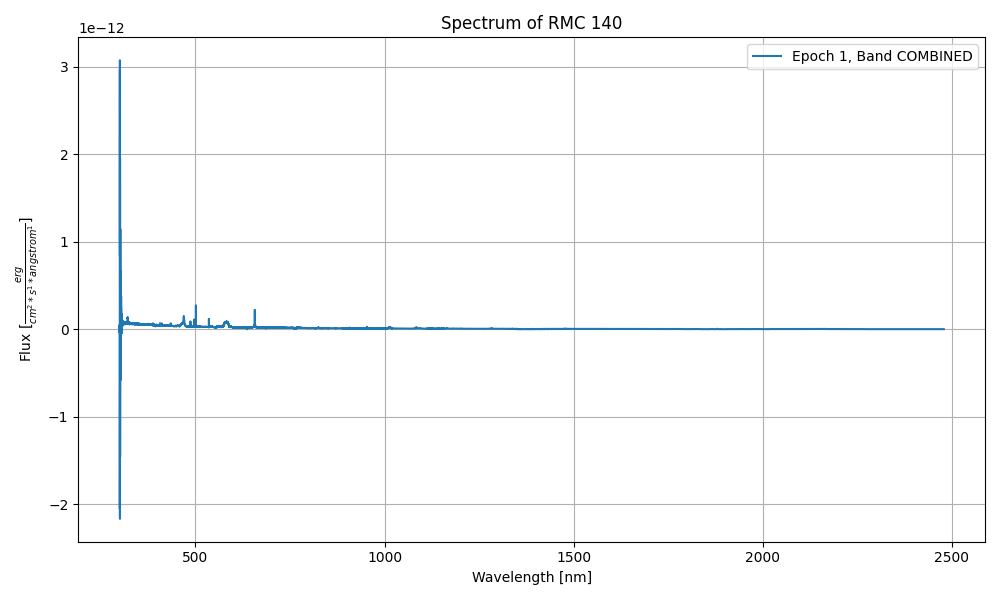

Data/HD  32402/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD  32402/epoch1/COMBINED/combined_bands.fits


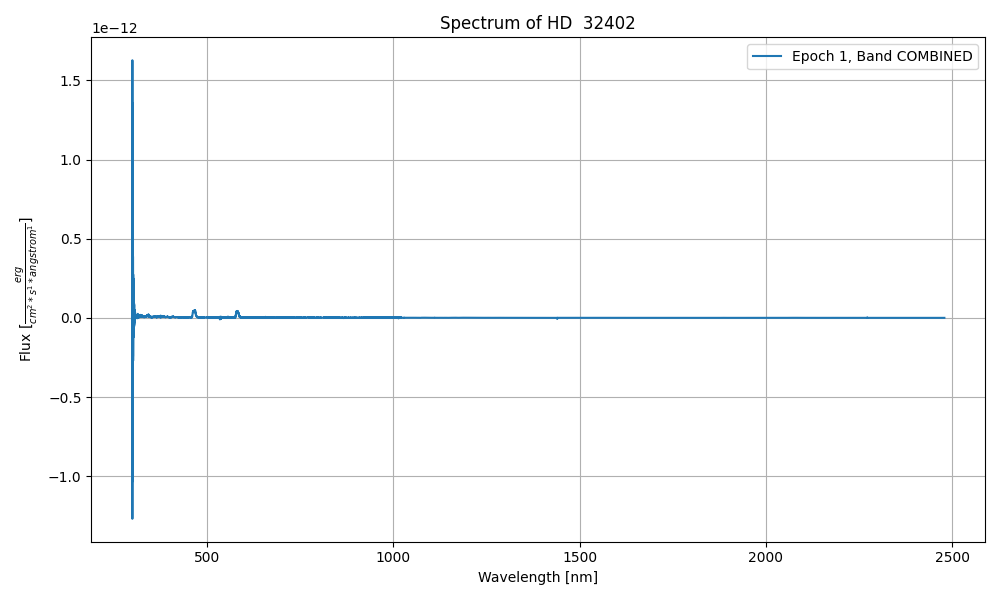

Data/Brey  70a/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/Brey  70a/epoch1/COMBINED/combined_bands.fits


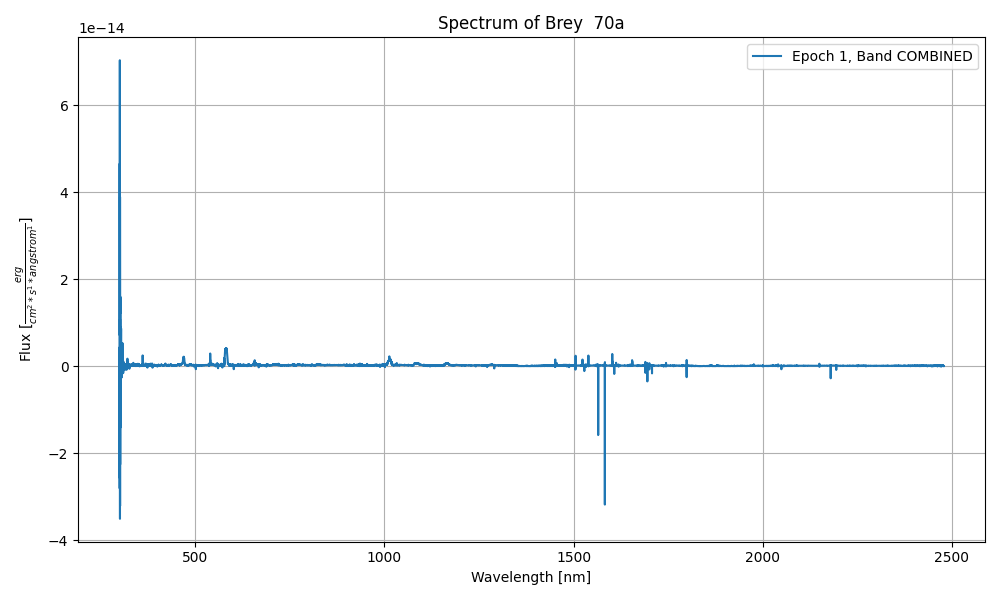

Data/Brey  16a/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/Brey  16a/epoch1/COMBINED/combined_bands.fits


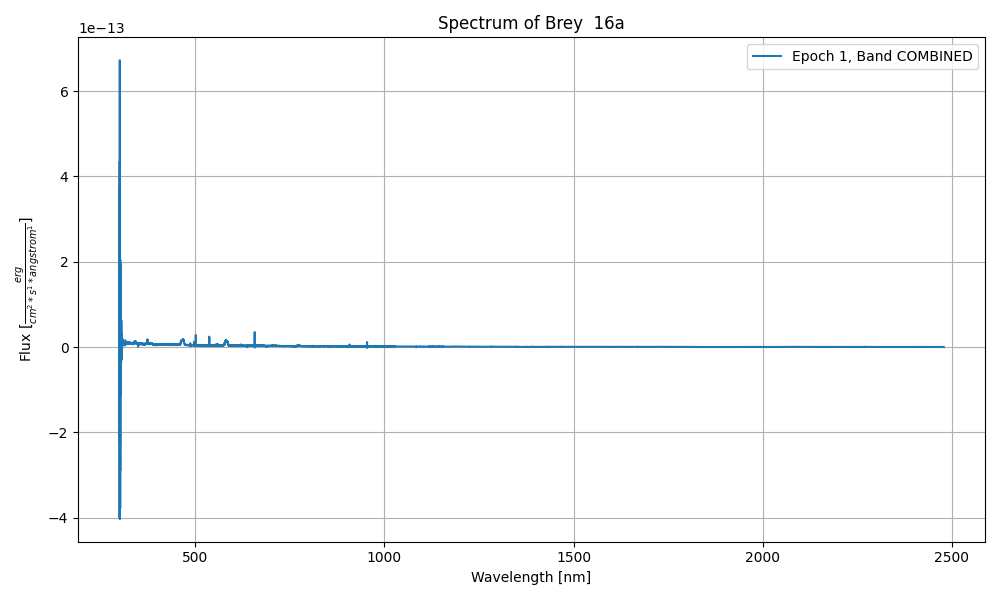

Data/Brey  93/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/Brey  93/epoch1/COMBINED/combined_bands.fits


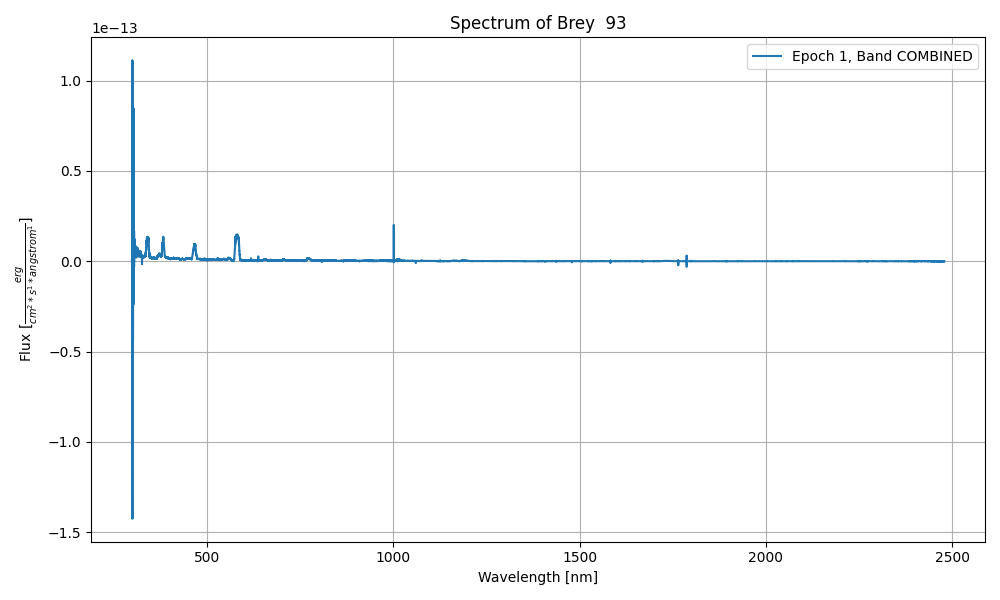

Data/Brey  90a/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/Brey  90a/epoch1/COMBINED/combined_bands.fits


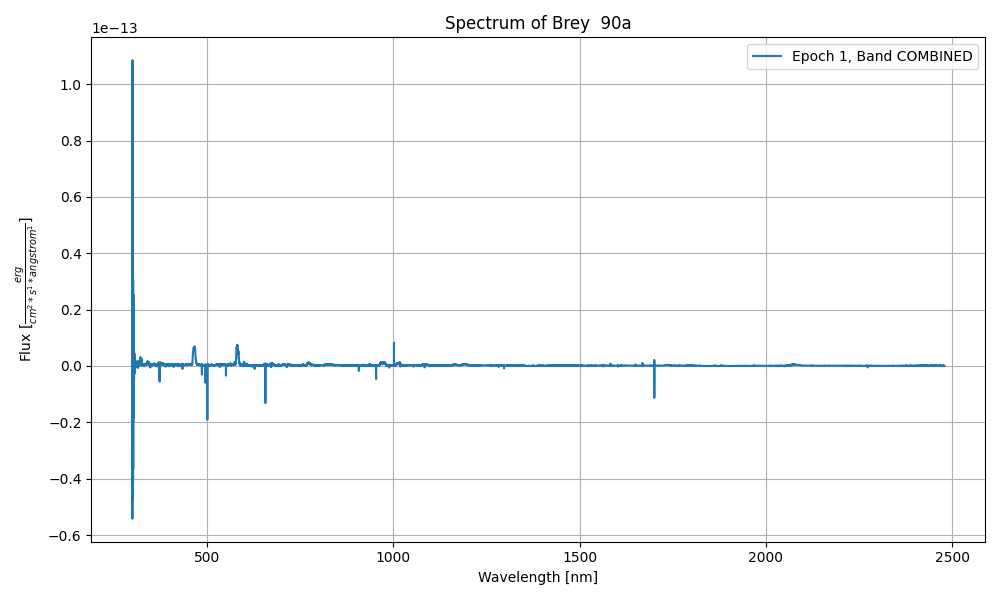

Data/HD 269891/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD 269891/epoch1/COMBINED/combined_bands.fits


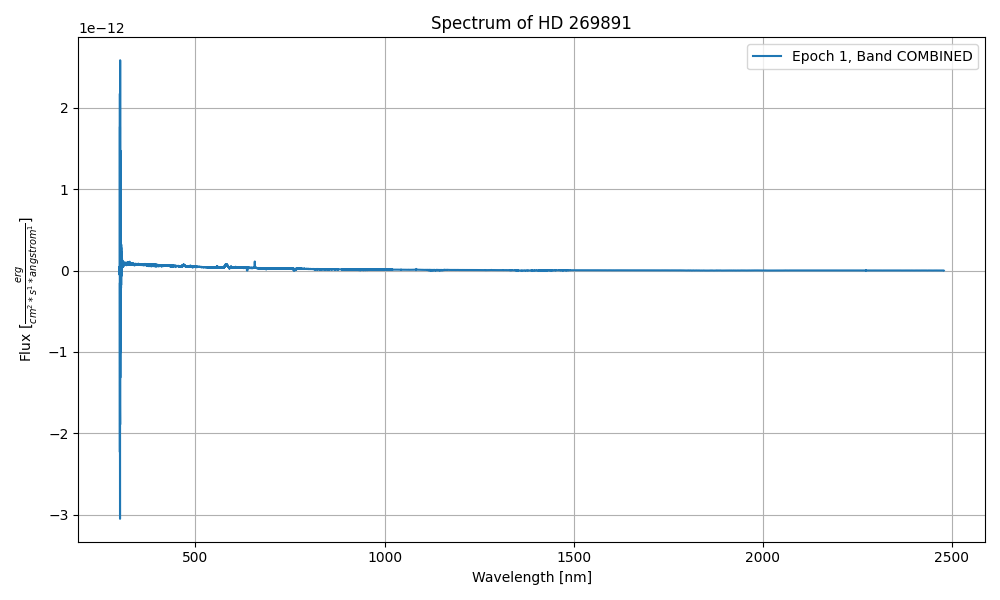

In [21]:
%matplotlib widget
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    for epoch in specs.obs_file_names[star_name]:
        epoch_num = int(epoch[-1])
        star.plot_spectra(epoch_num,'COMBINED')
        wave = waves[star_name][f'epoch{epoch_num}']
        flux_diff = flux_diffs[star_name][f'epoch{epoch_num}']
        plt.plot(wave, flux_diff, label = 'flux diffs')
        plt.legend()
        break

Data/HD  36156/epoch1/NIR/ADP.2020-11-13T11_44_23.955.fits
Data loaded from Data/HD  36156/epoch1/NIR/ADP.2020-11-13T11_44_23.955.fits


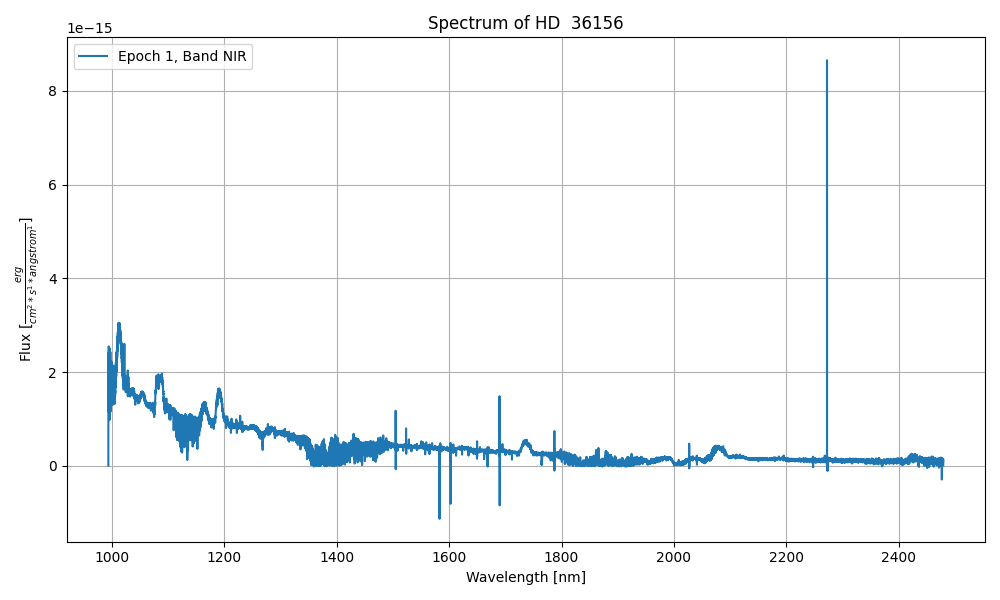

In [7]:
# plt.clf()
star.plot_spectra(1,'NIR')
plt.plot(wave,fit(wave), label = 'Normalized flux')
# plt.show()
# plt.legend

### Testing half-autometic half-manual approch for normalization

In [15]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import json
import os
import asyncio
import utils as ut

def interactive_normalization(star, epoch_number, band, batch_size=6, big_batch_size=10, filter_func=None, points_file=None):
    """
    Interactive method to manually adjust points for normalization using Plotly.

    Parameters:
        star: Star object containing spectral data and attributes.
        epoch_number (int): The epoch number of the spectrum.
        band (str): The band of the spectrum.
        batch_size (int): Size of batches for filtering function.
        big_batch_size (int): Size for big batch in filtering function.
        filter_func (callable or None): A function to filter points automatically.
        points_file (str or None): Path to a JSON file to save/load selected points.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Wavelength and normalized flux arrays.
    """

    # Step 1: Retrieve the spectrum data for the specified epoch and band
    # Replace this with your actual data retrieval code
    # For demonstration, we'll use sample data
    # Example:
    fits_file = star.load_observation(epoch_number, band)
    wavelength = fits_file.data['WAVE'][0]
    flux = fits_file.data['FLUX'][0]
    wavelength = np.array(wavelength, dtype=float)  # Convert to NumPy array if needed
    flux = np.array(flux, dtype=float)
    
    # Sample data for demonstration
    # wavelength = np.linspace(400, 700, 1000)
    # flux = np.sin(wavelength / 40) + np.random.normal(0, 0.1, size=wavelength.shape)

    # Apply the automatic filtering function if provided
    if filter_func is not None:
        selected_wavelengths, selected_fluxes = filter_func(wavelength, flux, batch_size, big_batch_size)
    else:
        # Initialize selected points
        if points_file and os.path.exists(points_file):
            # Load previously saved points
            with open(points_file, 'r') as f:
                selected_points = json.load(f)
            selected_wavelengths = selected_points['wavelength']
            selected_fluxes = selected_points['flux']
        else:
            # Start with empty selected points
            selected_wavelengths = []
            selected_fluxes = []

    

    # Create a Plotly FigureWidget
    fig = go.FigureWidget(
        data=[
            go.Scattergl(
                x=wavelength,
                y=flux,
                mode='markers',
                marker=dict(size=3, color='gray'),
                name='Data',
                selected=dict(marker=dict(color='blue')),
                unselected=dict(marker=dict(opacity=0.5))
            ),
            go.Scattergl(
                x=selected_wavelengths,
                y=selected_fluxes,
                mode='markers',
                marker=dict(size=8, color='red'),
                name='Selected Points'
            )
        ],
        layout=go.Layout(
            title='Interactive Normalization',
            xaxis_title='Wavelength',
            yaxis_title='Flux',
            showlegend=True
        )
    )

    # Variables to store selected points
    selected_wavelengths = list(selected_wavelengths)
    selected_fluxes = list(selected_fluxes)
    selected_points_trace = fig.data[1]

    # Function to handle point selection
    def on_point_click(trace, points, selector):
        # points.point_inds contains the indices of the clicked points
        if points.point_inds:
            for i in points.point_inds:
                x = trace.x[i]
                y = trace.y[i]
                # Check if point is already selected
                if x in selected_wavelengths and y in selected_fluxes:
                    # Remove the point
                    idx = selected_wavelengths.index(x)
                    selected_wavelengths.pop(idx)
                    selected_fluxes.pop(idx)
                else:
                    # Add the point
                    selected_wavelengths.append(x)
                    selected_fluxes.append(y)
            # Update the selected points trace
            selected_points_trace.x = selected_wavelengths
            selected_points_trace.y = selected_fluxes

    # Attach the callback to the data trace
    scatter_trace = fig.data[0]
    scatter_trace.on_click(on_point_click)

    # Display the figure
    display(fig)

    # Create Save and Finish buttons
    save_button = widgets.Button(description='Save Points')
    finish_button = widgets.Button(description='Finish')

    # Display the buttons
    display(widgets.HBox([save_button, finish_button]))

    # Function to save selected points
    def save_points(b):
        if points_file:
            selected_points = {
                'wavelength': selected_wavelengths,
                'flux': selected_fluxes
            }
            with open(points_file, 'w') as f:
                json.dump(selected_points, f)
            print(f"Selected points saved to {points_file}")
        else:
            print("No points_file provided to save the points.")

    save_button.on_click(save_points)

    # Async function to wait for the finish button click
    async def wait_for_finish():
        future = asyncio.Future()
        def on_finish_click(b):
            future.set_result(True)
        finish_button.on_click(on_finish_click)
        await future

    # Wait for the user to click 'Finish'
    import nest_asyncio
    nest_asyncio.apply()
    loop = asyncio.get_event_loop()
    loop.run_until_complete(wait_for_finish())

    # Proceed with processing after 'Finish' is clicked
    print('Processing selected points...')

    # Convert lists to arrays
    selected_wavelengths_array = np.array(selected_wavelengths)
    selected_fluxes_array = np.array(selected_fluxes)

    # Sort the selected points
    if len(selected_wavelengths_array) >= 2:
        sorted_indices = np.argsort(selected_wavelengths_array)
        selected_wavelengths_sorted = selected_wavelengths_array[sorted_indices]
        selected_fluxes_sorted = selected_fluxes_array[sorted_indices]

        # Perform linear interpolation between selected points
        interpolated_flux = np.interp(wavelength, selected_wavelengths_sorted, selected_fluxes_sorted)

        # Normalize the original flux
        normalized_flux = flux / interpolated_flux

        # Optionally, store the results in the 'star' object
        # star.normalized_wavelength = wavelength
        # star.normalized_flux = normalized_flux

        # Plot the normalized flux
        import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 6))
        plt.plot(wavelength, normalized_flux, label='Normalized Flux')
        plt.xlabel('Wavelength')
        plt.ylabel('Normalized Flux')
        plt.title('Normalized Spectrum')
        plt.legend()
        plt.show()

        # Return the wavelength and normalized flux
        return wavelength, normalized_flux

    else:
        print("Not enough points selected for interpolation.")
        return wavelength, flux, normalized_flux  # Return original data if not enough points


In [3]:
import numpy as np
import plotly.graph_objs as go
from ipywidgets import widgets, VBox, Layout
from IPython.display import display
import json
import os
import asyncio

def interactive_normalization(star, epoch_number, band, batch_size=6, big_batch_size=10, filter_func=None, points_file=None):
    """
    Interactive method to manually adjust points for normalization using Plotly.

    Parameters:
        star: Star object containing spectral data and attributes.
        epoch_number (int): The epoch number of the spectrum.
        band (str): The band of the spectrum.
        points_file (str or None): Path to a JSON file to save/load selected points.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Wavelength and normalized flux arrays.
    """

    # Step 1: Retrieve the spectrum data for the specified epoch and band
    # Replace this with your actual data retrieval code
    # For demonstration, we'll use sample data
    # Example:
    fits_file = star.load_observation(epoch_number, band)
    wavelength = np.array(fits_file.data['WAVE'][0])
    flux = np.array(fits_file.data['FLUX'][0])
    
    # Sample data for demonstration
    # wavelength = np.linspace(400, 700, 1000)
    # flux = np.sin(wavelength / 40) + np.random.normal(0, 0.1, size=wavelength.shape)

    # Initialize selected points
    # selected_wavelengths = []
    # selected_fluxes = []

    # Apply the automatic filtering function if provided
    if filter_func is not None:
        selected_wavelengths, selected_fluxes = filter_func(wavelength, flux, batch_size, big_batch_size)
    else:
        # Initialize selected points
        if points_file and os.path.exists(points_file):
            # Load previously saved points
            with open(points_file, 'r') as f:
                selected_points = json.load(f)
            selected_wavelengths = selected_points['wavelength']
            selected_fluxes = selected_points['flux']
        else:
            # Start with empty selected points
            selected_wavelengths = []
            selected_fluxes = []

    selected_wavelengths = np.array(selected_wavelengths)
    selected_fluxes = np.array(selected_fluxes)

    # Create a Plotly FigureWidget
    fig = go.FigureWidget(
        data=[
            go.Scattergl(
                x=wavelength,
                y=flux,
                mode='markers',
                marker=dict(size=3, color='gray'),
                name='Data',
            ),
            go.Scattergl(
                x=selected_wavelengths,
                y=selected_fluxes,
                mode='markers',
                marker=dict(size=8, color='red'),
                name='Selected Points',
            )
        ],
        layout=go.Layout(
            title='Interactive Normalization',
            xaxis_title='Wavelength',
            yaxis_title='Flux',
            showlegend=True
        )
    )

    # Display the figure
    display(fig)

    # Variables to store selected points
    # selected_wavelengths = list(selected_wavelengths)
    # selected_fluxes = list(selected_fluxes)
    selected_points_trace = fig.data[1]

    # Step 2: Define interaction callbacks

    # Function to handle point selection and deletion
    def on_point_click(trace, points, selector):
        if points.point_inds:
            for i in points.point_inds:
                x = trace.x[i]
                y = trace.y[i]

                if (x, y) in zip(selected_wavelengths, selected_fluxes):
                    # Remove the point if already selected
                    idx = selected_wavelengths.index(x)
                    selected_wavelengths.pop(idx)
                    selected_fluxes.pop(idx)
                else:
                    # Add the point if not selected
                    selected_wavelengths.append(x)
                    selected_fluxes.append(y)

            # Update the selected points trace
            with fig.batch_update():
                selected_points_trace.x = selected_wavelengths
                selected_points_trace.y = selected_fluxes

    # Attach the callback to the data trace
    scatter_trace = fig.data[0]
    scatter_trace.on_click(on_point_click)

    # Step 3: Create buttons for saving and finishing
    save_button = widgets.Button(description='Save Points', layout=Layout(width='150px'))
    finish_button = widgets.Button(description='Finish', layout=Layout(width='150px'))

    # Function to save selected points
    def save_points(b):
        if points_file:
            selected_points = {
                'wavelength': selected_wavelengths,
                'flux': selected_fluxes
            }
            with open(points_file, 'w') as f:
                json.dump(selected_points, f)
            print(f"Selected points saved to {points_file}")
        else:
            print("No points_file provided to save the points.")

    save_button.on_click(save_points)

    # Async function to wait for the finish button click
    async def wait_for_finish():
        future = asyncio.Future()

        def on_finish_click(b):
            future.set_result(True)

        finish_button.on_click(on_finish_click)
        await future

    # Display the buttons below the plot
    display(VBox([save_button, finish_button]))

    # Step 4: Wait for user to finish selection
    import nest_asyncio
    nest_asyncio.apply()
    loop = asyncio.get_event_loop()
    loop.run_until_complete(wait_for_finish())

    # Step 5: Process and normalize the data
    if len(selected_wavelengths) >= 2:
        # Sort the selected points
        sorted_indices = np.argsort(selected_wavelengths)
        selected_wavelengths_sorted = np.array(selected_wavelengths)[sorted_indices]
        selected_fluxes_sorted = np.array(selected_fluxes)[sorted_indices]

        # Perform linear interpolation between selected points
        interpolated_flux = np.interp(wavelength, selected_wavelengths_sorted, selected_fluxes_sorted)

        # Normalize the original flux
        normalized_flux = flux / interpolated_flux

        # Plot the normalized flux
        import matplotlib.pyplot as plt
        %matplotlib inline
        plt.figure(figsize=(12, 6))
        plt.plot(wavelength, normalized_flux, label='Normalized Flux')
        plt.xlabel('Wavelength')
        plt.ylabel('Normalized Flux')
        plt.title('Normalized Spectrum')
        plt.legend()
        plt.show()

        return wavelength, normalized_flux
    else:
        print("Not enough points selected for interpolation.")
        return wavelength, flux  # Return original data if not enough points



### testing robust functions runs

In [5]:
stars = specs.star_names[1:5]
overwrite = True
numbers = list(np.arange(0,20,1))
params = {}
# params['number'] = numbers
params['property_to_delete'] = 'test_method'
params['delete_all'] = True
params['delete_all_in_folder'] = True
# star.delete_files(delete_all_in_folder=
manager.execute_method_on_stars('delete_files',stars = stars,overwrite=overwrite,backup=False,parallel = False,params = params)

[{'epoch_num': 1, 'band': 'NIR', 'property_to_delete': 'test_method', 'delete_all': True, 'delete_all_in_folder': True}, {'epoch_num': 1, 'band': 'VIS', 'property_to_delete': 'test_method', 'delete_all': True, 'delete_all_in_folder': True}, {'epoch_num': 1, 'band': 'UVB', 'property_to_delete': 'test_method', 'delete_all': True, 'delete_all_in_folder': True}, {'epoch_num': 1, 'band': 'COMBINED', 'property_to_delete': 'test_method', 'delete_all': True, 'delete_all_in_folder': True}, {'epoch_num': 2, 'band': 'NIR', 'property_to_delete': 'test_method', 'delete_all': True, 'delete_all_in_folder': True}, {'epoch_num': 2, 'band': 'VIS', 'property_to_delete': 'test_method', 'delete_all': True, 'delete_all_in_folder': True}, {'epoch_num': 2, 'band': 'UVB', 'property_to_delete': 'test_method', 'delete_all': True, 'delete_all_in_folder': True}, {'epoch_num': 2, 'band': 'COMBINED', 'property_to_delete': 'test_method', 'delete_all': True, 'delete_all_in_folder': True}, {'epoch_num': 3, 'band': 'NIR

{'Brey  83': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'HD  38029': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'HD  37248': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'Brey  95a': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]}

### testing and older normaliztion

In [5]:
%%time
results = []
obs_manager = obsm()
star_names = specs.star_names
# Define parameter ranges
star_names_list = star_names[7:8]
batch_size_list = [4,6]
detection_list = [2,3]
use_spline_list = [True]
spline_smoothness_list = [1]
# spline_smoothness_list = [1]
spline_degree_list = [2,3]
num_prev_batches_list = [3,5,8]
exit_factors_list = [100,110,200]
bands_list = ['NIR','VIS','UVB']
bands_list = ['NIR']
continuum_degree_list = [0]
num_points_for_fit_list = [10,20]
skip_list = [50, 100]
epochs_list = [1,2,3,4,5,6,7]
epochs_list = [1]
# star = manager.create_star_instance(star_name)

# star_names_list = star_names[20:21]
# batch_size_list = [10]
# detection_list = [1,2]
# use_spline_list = [True]
# spline_smoothness_list = [0, 1]
# spline_smoothness_list = [1]
# spline_degree_list = [2]
# num_prev_batches_list = [3,]
# exit_factors_list = [10]
# bands_list = ['NIR']
# continuum_degree_list = [0]
# num_points_for_fit_list = [10]
# skip_list = [50, 100]
epochs_list = [1]

# args = (

# Create list of all parameter combinations
param_list = list(itertools.product(
    batch_size_list,
    detection_list,
    use_spline_list,
    spline_smoothness_list,
    spline_degree_list,
    num_prev_batches_list,
    exit_factors_list,
    bands_list,
    continuum_degree_list,
    num_points_for_fit_list,
    skip_list,
    star_names_list,
    epochs_list
))

# Transpose the list of tuples into a tuple of lists
# param_tuple_of_lists = tuple(map(list, zip(*param_list)))

# print(param_list)

def run_normalize_spectrum(batch_size, detection, use_spline, spline_smoothness, spline_degree, num_prev_batches, exit_factor, band, continuum_degree, num_points_for_fit, skip, star_name,epoch_num):
    # batch_size, detection, use_spline, spline_smoothness, spline_degree, num_prev_batches, exit_factor, band, continuum_degree, num_points_for_fit, skip, star_name = params
    params = (batch_size, detection, use_spline, spline_smoothness, spline_degree, num_prev_batches, exit_factor, band, continuum_degree, num_points_for_fit, skip, star_name,epoch_num)
    star = obs_manager .create_star_instance(star_name)
    print(star_name)
    # Compute the starting wavelength
    # start_wv = 994.02 + (2478.96 - 994.02) / 24750 * skip
    # print(f'Starts from wv: {start_wv}')

    # Run the normalization
    fit = star.normalize_spectrum2(
        [epoch_num], [band],
        batch_size=batch_size,
        detection=detection,
        skip=skip,
        num_prev_batches=num_prev_batches,
        exit_factor=exit_factor,
        use_spline=use_spline,
        continuum_degree=continuum_degree,
        num_points_for_fit=num_points_for_fit,
        spline_smoothness=spline_smoothness,
        spline_degree=spline_degree
    )
    # print(star.normalized_spectra)
    wavelengths = star.normalized_spectra[f'epoch{epoch_num}'][band]['wavelength']

    score = star.norm_fit_score(fit,wavelengths)
    
    # Optionally, compute a score or save results
    res = (params, fit, score)
    # np.savez_compressed(f'./Data/{star_name}/epoch{epoch_num}/{band}/norm_fit_results_score{score}_p_{params}.npz',params = params, fit = fit, score = score)
    return params, fit, score

if __name__ == '__main__':
    num_processes = multiprocess.cpu_count() - 1  # Adjust based on your system's cores
    print(f'Number of args (processes) is: {len(param_list)} and number of CPUS is: {num_processes}')
    with Pool(processes=num_processes) as pool:
        result = pool.starmap(run_normalize_spectrum, param_list)
        # result = list(tqdm(pool.imap(run_normalize_spectrum,param_list)))
        # np.savez_compressed(
        results = result
    print("Completed all parameter combinations.")

# if __name__ == '__main__':
#     num_processes = multiprocess.cpu_count()  # Adjust based on your system's cores
#     print(f'Number of args (processes) is: {len(param_list)} and number of CPUS is: {num_processes}')
#     # with Pool(processes=num_processes) as pool:
#         # result = pool.starmap(run_normalize_spectrum, param_list)
#     result = process_map(run_normalize_spectrum,param_list,max_workes=num_processes,chunksize = 1)
#     # np.savez_compressed(
#     results = result
#     print("Completed all parameter combinations.")


Number of args (processes) is: 288 and number of CPUS is: 11
HD  37026HD  37026HD  37026HD  37026HD  37026HD  37026HD  37026

HD  37026HD  37026HD  37026



HD  37026






/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/guyshtainer/

24561

/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


24561


/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,


/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


24561

/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrm

2456124561

/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


24561


/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/guyshtainer/miniconda/envs/guy

24561

/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



2456124561



/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gu

24561

/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


24561
1.164862303916136e-16
9.562339911730096e-17Processed and normalized epoch1 -> NIR successfully.

Processed and normalized epoch1 -> NIR successfully.
HD  37026
HD  37026
1.0138452625317076e-16
Processed and normalized epoch1 -> NIR successfully.
HD  370269.878503818301498e-17

Processed and normalized epoch1 -> NIR successfully.1.0562562368001743e-16

9.115548590199391e-17Processed and normalized epoch1 -> NIR successfully.HD  37026


Processed and normalized epoch1 -> NIR successfully.HD  37026

9.562339911730096e-17
Processed and normalized epoch1 -> NIR successfully.HD  37026

1.0138452625317076e-16HD  37026

Processed and normalized epoch1 -> NIR successfully.
1.164862303916136e-16
HD  37026Processed and normalized epoch1 -> NIR successfully.

9.878503818301498e-17
1.068941459410915e-16Processed and normalized epoch1 -> NIR successfully.HD  37026

HD  37026

Processed and normalized epoch1 -> NIR successfully.
HD  37026
24561
24561
24561
24561
245612456124561


24561
24561245

In [6]:
%%time
obs_manager = obsm()
def process_star(star_name, shared_best_scores_dict, lock, batch_size_list,
                                skip_list,
                                continuum_degree_list,
                                use_spline_list,
                                spline_smoothness_list,
                                detection_list,
                                num_prev_batches_list,
                                exit_factors_list,
                                num_points_for_fit_list,
                                spline_degree_list):
    star = obs_manager.create_star_instance(star_name)
    star.multi_p_normalize_spectrum(shared_best_scores_dict, lock,
                                batch_size_list=batch_size_list,
                                skip_list=skip_list,
                                continuum_degree_list=continuum_degree_list,
                                use_spline_list=use_spline_list,
                                spline_smoothness_list=spline_smoothness_list,
                                detection_list=detection_list,
                                num_prev_batches_list=num_prev_batches_list,
                                exit_factors_list=exit_factors_list,
                                num_points_for_fit_list=num_points_for_fit_list,
                                spline_degree_list=spline_degree_list)

# Main code to run multiprocessing
if __name__ == '__main__':
    # Necessary for Windows to prevent recursive spawning of processes
    import multiprocess

    # List of Star objects to process
    star_list = specs.star_names[11:12]  # Replace with your list of Star objects

    manager = Manager()
    shared_best_scores_dict = manager.dict()
    lock = manager.Lock()

    # Parameters:
    star_names_list = specs.star_names[7:8]
    batch_size_list = [4,6, 8, 10]
    detection_list = [1,2,2.5, 3,4]
    detection_list = [2,3]
    use_spline_list = [True]
    spline_smoothness_list = [0, 1]
    # spline_smoothness_list = [1]
    spline_degree_list = [2,3,4,5]
    spline_degree_list = [2,3]
    num_prev_batches_list = [3,5,8,10,20]
    num_prev_batches_list = [3,5,20]
    exit_factors_list = [10,50,100,110,200]
    exit_factors_list = [10,110]
    bands_list = ['NIR','VIS','UVB']
    continuum_degree_list = [0]
    num_points_for_fit_list = [10,20,50]
    num_points_for_fit_list = [10,50]
    skip_list = [50, 100]
    epochs_list = [1,2,3,4,5,6,7]
    epochs_list = [1]
    # Initialize the shared dictionary with empty lists for each band
    # Assuming you have a list of all possible bands
    all_epochs = [f'epoch{i}' for i in range(1,8)]
    all_bands = ['NIR', 'VIS', 'UVB']  # Replace with your actual band names
    for epoch in all_epochs:
        shared_best_scores_dict[epoch] = manager.dict()
        for band in all_bands:
            shared_best_scores_dict[epoch][band] = manager.list()

    processes = []
    for star in star_names_list:
        p = multiprocess.Process(target=process_star, args=(star, shared_best_scores_dict, lock,batch_size_list,
                                skip_list,
                                continuum_degree_list,
                                use_spline_list,
                                spline_smoothness_list,
                                detection_list,
                                num_prev_batches_list,
                                exit_factors_list,
                                num_points_for_fit_list,
                                spline_degree_list))
        p.start()
        processes.append(p)

    # Wait for all processes to finish
    for p in processes:
        p.join()

    # After processing all stars, shared_best_scores_dict will contain the best 5 scores per band
    print("Best 5 scores per band:")
    print(shared_best_scores_dict)
    for epoch in shared_best_scores_dict:
        for band in shared_best_scores_dict[epoch]:
            print(f"\nEpoch: {epoch} and Band: {band}")
            for score_info in shared_best_scores_dict[epoch][band][0]:
                print(score_info)

For star HD  37026 its gonna open about 768 threads
Error reading FITS file 'Data/HD  37026/epoch1/NIR/norm_fit_results_score12.000000000000012_p_(4, 2, True, 0, 4, 3, 10, 'NIR', 0, 10, 50, 'HD  37026', 1).npz': Zip files with multiple members are not supported.Error reading FITS file 'Data/HD  37026/epoch1/NIR/norm_fit_results_score12.000000000000012_p_(4, 2, True, 0, 4, 3, 10, 'NIR', 0, 10, 50, 'HD  37026', 1).npz': Zip files with multiple members are not supported.Error reading FITS file 'Data/HD  37026/epoch1/NIR/norm_fit_results_score12.000000000000012_p_(4, 2, True, 0, 4, 3, 10, 'NIR', 0, 10, 50, 'HD  37026', 1).npz': Zip files with multiple members are not supported.Error reading FITS file 'Data/HD  37026/epoch1/NIR/norm_fit_results_score12.000000000000012_p_(4, 2, True, 0, 4, 3, 10, 'NIR', 0, 10, 50, 'HD  37026', 1).npz': Zip files with multiple members are not supported.Error reading FITS file 'Data/HD  37026/epoch1/NIR/norm_fit_results_score12.000000000000012_p_(4, 2, True, 0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.

Processed and normalized HD  37026 -> epoch2 -> NIR successfully.Processed and normalized HD  37026 -> epoch2 -> NIR successfully.
Processed and normalized HD  37026 -> epoch2 -> NIR successfully.
Processed and normalized HD  37026 -> epoch2 -> NIR successfully.Processed and normalized HD  37026 -> epoch2 -> NIR successfully.Processed and normalized HD  37026 -> epoch2 -> NIR successfully.



Processed and normalized HD  37026 -> epoch2 -> NIR successfully.Processed and normalized HD  37026 -> epoch2 -> NIR successfully.
Processed and normalized HD  37026 -> epoch2 -> NIR successfully.Processed and normalized HD  37026 -> epoch2 -> NIR successfully.
Processed and normalized HD  37026 -> epoch2 -> NIR successfully.

Processed and normalized HD  37026 -> epoch2 -> NIR successfully.
Processed and normalized HD  37026 -> epoch2 -> NIR successfully.Processed and normalized HD  37026 -> epoch2 -> NIR successfully.Processed and normalized HD  37026 -> epoch2 -> NIR successfully.



Processed 

KeyboardInterrupt: 

Processed and normalized HD  37026 -> epoch2 -> UVB successfully.Processed and normalized HD  37026 -> epoch2 -> UVB successfully.
Processed and normalized HD  37026 -> epoch2 -> NIR successfully.Processed and normalized HD  37026 -> epoch2 -> UVB successfully.Processed and normalized HD  37026 -> epoch2 -> UVB successfully.Processed and normalized HD  37026 -> epoch2 -> UVB successfully.


In [6]:
# print(results[0:4])

sorted_results = sorted(results, key=lambda column: column[2],reverse = False)

print(sorted_results[0:10])

[((4, 3, True, 1, 2, 5, 110, 'NIR', 0, 20, 50, 'HD  37026', 1), <scipy.interpolate._fitpack2.LSQUnivariateSpline object at 0x11d5931a0>, np.float64(2.1621653544520022e-15)), ((4, 3, True, 1, 2, 5, 110, 'NIR', 0, 20, 100, 'HD  37026', 1), <scipy.interpolate._fitpack2.LSQUnivariateSpline object at 0x11d591550>, np.float64(2.1621653544520022e-15)), ((4, 3, True, 1, 2, 3, 110, 'NIR', 0, 10, 50, 'HD  37026', 1), <scipy.interpolate._fitpack2.LSQUnivariateSpline object at 0x11d5917c0>, np.float64(2.279683291838068e-15)), ((4, 3, True, 1, 2, 3, 110, 'NIR', 0, 10, 100, 'HD  37026', 1), <scipy.interpolate._fitpack2.LSQUnivariateSpline object at 0x11d553650>, np.float64(2.279683291838068e-15)), ((4, 3, True, 1, 2, 5, 100, 'NIR', 0, 10, 50, 'HD  37026', 1), <scipy.interpolate._fitpack2.LSQUnivariateSpline object at 0x11cf05190>, np.float64(2.285196451834701e-15)), ((4, 3, True, 1, 2, 5, 100, 'NIR', 0, 10, 100, 'HD  37026', 1), <scipy.interpolate._fitpack2.LSQUnivariateSpline object at 0x11d592510>

In [7]:
star = manager.create_star_instance(sorted_results[0][0][-1])
fits_file_path = star.get_file_path(1,'NIR')
with fits.open(fits_file_path) as hdulist:
    data = hdulist[1].data
    dataheader = hdulist[1].header
    header = hdulist[0].header
wave = data['WAVE'][0]
fitted_continuum = sorted_results[0][1](wave)
# print(fitted_continuum[-10:])
plt.plot(wave*10,fitted_continuum)
plt.plot(data['WAVE'][0]*10,data['FLUX'][0])
plt.xlabel(r'Wavelength $(\AA)$')
plt.ylabel('Flux (erg/s...)')

Error: Star '1' is not in the list of star names in specs.py.


AttributeError: 'NoneType' object has no attribute 'get_file_path'

Text(0, 0.5, 'Normalized')

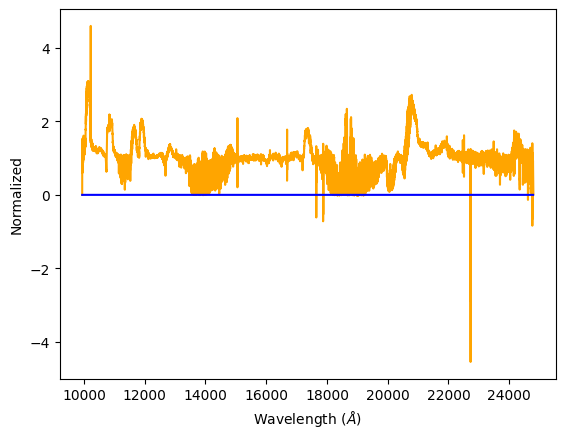

In [28]:
star = manager.create_star_instance(sorted_results[0][0][-1])
fits_file_path = star.get_file_path(1,'NIR')
with fits.open(fits_file_path) as hdulist:
    data = hdulist[1].data
    dataheader = hdulist[1].header
    header = hdulist[0].header
end = -1300
wave = data['WAVE'][0]
normalized_flux = data['FLUX'][0]/sorted_results[0][1](wave)
# print(fitted_continuum[-10:])
plt.plot(wave*10,normalized_flux,color = 'oRANGE')
plt.plot(data['WAVE'][0]*10,data['FLUX'][0],color = 'b')
# plt.plot(wave*10,fitted_continuum)
# plt.xlim(20000,21000)
plt.xlabel(r'Wavelength $(\AA)$')
plt.ylabel('Normalized')

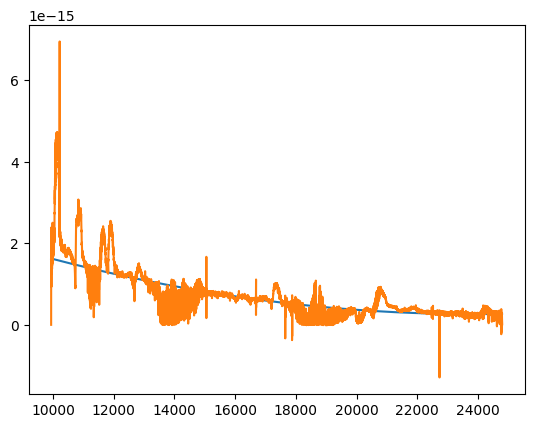

In [19]:
place = 14
star = manager.create_star_instance(sorted_results[place][0][-1])
fits_file_path = star.get_file_path(1,'NIR')
with fits.open(fits_file_path) as hdulist:
    data = hdulist[1].data
    dataheader = hdulist[1].header
    header = hdulist[0].header
wave = data['WAVE'][0]
fitted_continuum = sorted_results[place][1](wave)
# print(fitted_continuum[-10:])
plt.plot(wave*10,fitted_continuum)
plt.plot(data['WAVE'][0]*10,data['FLUX'][0])

In [5]:
star_names = specs.star_names
print(star_names)
star = manager.create_star_instance(star_names[1])
batch_size = 10
sensitivity = 1e-15
detection = 2
num_prev_batches = 10
exit_factor = 110
use_spline = True
# use_spline = False
spline_smoothness = 1
spline_degree = 2
skip = 150
continuum_degree = 10
num_points_for_fit = 10
band = 'NIR'
print(f'Starts from wv: {994.02 + (2478.96-994.02)/24750*skip}')
fits_file_path = star.get_file_path(1,band)
with fits.open(fits_file_path) as hdulist:
    data = hdulist[1].data
    dataheader = hdulist[1].header
    header = hdulist[0].header
flux = data['FLUX'][0]
# print(len(data['WAVE'][0]))
# print(data['WAVE'][0])
# star.Tomer_plot(1,1,band)
star.normalize_spectrum2([1],[band], batch_size=batch_size, detection=detection, skip=skip, num_prev_batches=num_prev_batches,
                         exit_factor = exit_factor, use_spline=use_spline,
                         continuum_degree=continuum_degree, num_points_for_fit=num_points_for_fit, spline_smoothness=spline_smoothness, spline_degree=spline_degree)

norm = star.normalized_spectra

['Brey  70', 'Brey  83', 'HD  38029', 'HD  37248', 'Brey  95a', 'MNM2014 LMC195-1', 'HD  32125', 'HD  37026', 'HD 269818', 'HD  38448', 'HD  38030', 'HD  37680', 'Brey  58a', 'HD  32228', 'HD  32257', 'HD 269888', 'HD  36156', 'H2013 LMCe  584', 'L72 LH  41-1042', 'RMC 140', 'HD  32402', 'Brey  70a', 'Brey  16a', 'Brey  93', 'Brey  90a', 'HD 269891']
Starts from wv: 1003.0196363636363
mean std is 4.3255839897628814e-17
std is 7.563154113759138e-16
 skip turned to be: 66
24685
4.672253775074925e-16
Processed and normalized epoch1 -> NIR successfully.


/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/guyshtainer/miniconda/envs/guyenv/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# testing fits files

## combining fits files

In [1]:
%matplotlib widget
from ObservationClass import ObservationManager as obsm
import specs as specs
obs = obsm()
# for star_name in specs.star_names:
#     star = obs.load_star_instance(star_name)
#     star.combine_fits_files()
# fits_file = star.load_observation(1,'COMBINED')
# star.delete_files(1,'COMBINED',property_to_delete='norm_anchors_results.npz')

In [2]:
params = {}
params['band'] = 'COMBINED'
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    # listp = [int(epoch[-1]) for epoch in specs.obs_file_names[star_name]]
    # params['epoch_nums'] = listp
    # star.combine_fits_files(
    star.execute_method(star.combine_fits_files,params=params,parallel=True,overwrite=True,backup=False)

[{'epoch_num': 1, 'band': 'COMBINED'}, {'epoch_num': 1, 'band': 'COMBINED'}, {'epoch_num': 1, 'band': 'COMBINED'}, {'epoch_num': 1, 'band': 'COMBINED'}, {'epoch_num': 2, 'band': 'COMBINED'}, {'epoch_num': 2, 'band': 'COMBINED'}, {'epoch_num': 2, 'band': 'COMBINED'}, {'epoch_num': 2, 'band': 'COMBINED'}, {'epoch_num': 3, 'band': 'COMBINED'}, {'epoch_num': 3, 'band': 'COMBINED'}, {'epoch_num': 3, 'band': 'COMBINED'}, {'epoch_num': 3, 'band': 'COMBINED'}, {'epoch_num': 4, 'band': 'COMBINED'}, {'epoch_num': 4, 'band': 'COMBINED'}, {'epoch_num': 4, 'band': 'COMBINED'}, {'epoch_num': 4, 'band': 'COMBINED'}, {'epoch_num': 5, 'band': 'COMBINED'}, {'epoch_num': 5, 'band': 'COMBINED'}, {'epoch_num': 5, 'band': 'COMBINED'}, {'epoch_num': 5, 'band': 'COMBINED'}, {'epoch_num': 6, 'band': 'COMBINED'}, {'epoch_num': 6, 'band': 'COMBINED'}, {'epoch_num': 6, 'band': 'COMBINED'}, {'epoch_num': 6, 'band': 'COMBINED'}]
Overwriting existing output 'Data/Brey  70/epoch1/COMBINED/output/combine_fits_files/.n

In [7]:
star.list_available_properties()


Available properties for star 'Brey  70':

Epoch      Band       Property                                 Type       Details        
-----------------------------------------------------------------------------------------
1          .ipynb_checkpoints (No output directory)                                              
1          COMBINED   norm_anchors_results.npz                 File                      
1          NIR        norm.npz                                 File                      
1          NIR        norm_anchors_results.npz                 File                      
1          UVB        Figures                                  Folder     2 files        
1          UVB        norm_anchors_results.npz                 File                      
1          VIS        norm_anchors_results.npz                 File                      
2          COMBINED   (No output directory)                                              
2          NIR        norm_anchors_results.npz  

Data/Brey  16a/epoch1/NIR/ADP.2020-11-13T13_19_45.598.fits
Data loaded from Data/Brey  16a/epoch1/NIR/ADP.2020-11-13T13_19_45.598.fits
Data/Brey  16a/epoch1/VIS/ADP.2020-11-13T13_19_45.695.fits
Data loaded from Data/Brey  16a/epoch1/VIS/ADP.2020-11-13T13_19_45.695.fits
Data/Brey  16a/epoch1/UVB/ADP.2020-11-13T13_19_45.691.fits
Data loaded from Data/Brey  16a/epoch1/UVB/ADP.2020-11-13T13_19_45.691.fits
Data/Brey  16a/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/Brey  16a/epoch1/COMBINED/combined_bands.fits


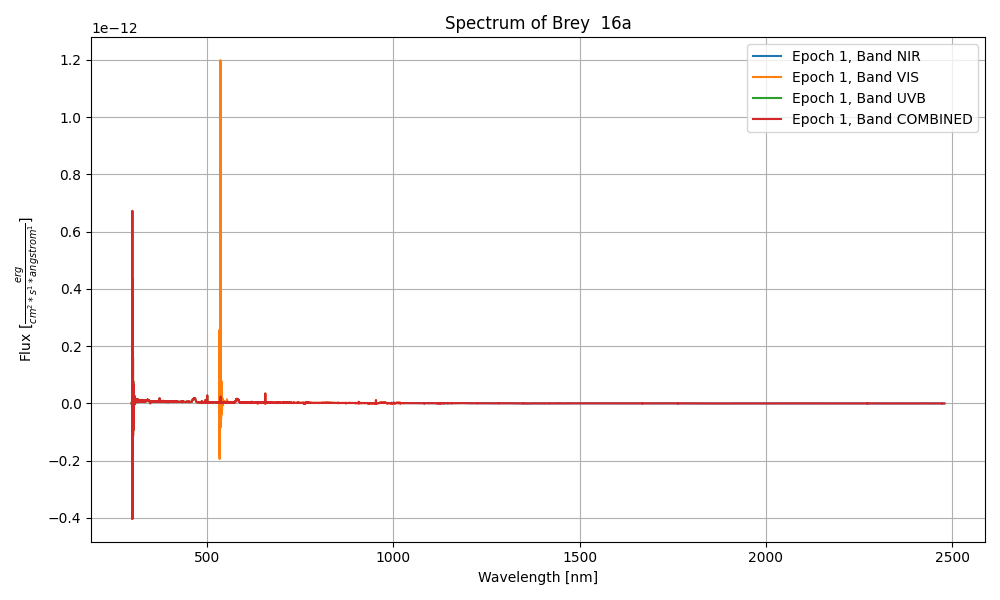

In [2]:
star.plot_spectra(1)

In [3]:
fits_file.print_file_info()

Opened FITS file: Data/Brey  70/epoch1/COMBINED/combined_bands.fits
Number of HDUs: 2
HDU 0: PrimaryHDU
------------------------------------------------------------
Header:
SIMPLE = True
BITPIX = 8
NAXIS = 0
EXTEND = True
------------------------------------------------------------
Image Data Shape: None
Image Data Type: None
HDU 1: BinTableHDU
------------------------------------------------------------
Header:
XTENSION = BINTABLE
BITPIX = 8
NAXIS = 2
NAXIS1 = 1970332
NAXIS2 = 1
PCOUNT = 0
GCOUNT = 1
TFIELDS = 7
TTYPE1 = WAVE
TFORM1 = 37891D
TUNIT1 = nm
TTYPE2 = FLUX
TFORM2 = 37891D
TUNIT2 = erg cm**(-2) s**(-1) angstrom**(-1)
TTYPE3 = ERR
TFORM3 = 37891D
TUNIT3 = erg cm**(-2) s**(-1) angstrom**(-1)
TTYPE4 = QUAL
TFORM4 = 37891J
TTYPE5 = SNR
TFORM5 = 37891D
TTYPE6 = FLUX_REDUCED
TFORM6 = 37891D
TUNIT6 = adu
TTYPE7 = ERR_REDUCED
TFORM7 = 37891D
TUNIT7 = adu
DISPELEM = COMBINED
NELEM = 37891
------------------------------------------------------------
Table Columns:
Name: WAVE, Format: 

In [9]:
import numpy as np
fits_file = star.load_observation(1,'NIR')
wave = fits_file.data['WAVE'][0]
print(np.min([wave[i+1]-wave[i] for i in range(len(wave)-1)]))
l1 = len(wave)
fits_file = star.load_observation(1,'VIS')
wave = fits_file.data['WAVE'][0]
print(np.min([wave[i+1]-wave[i] for i in range(len(wave)-1)]))
l2 = len(wave)
fits_file = star.load_observation(1,'UVB')
wave = fits_file.data['WAVE'][0]
print(np.min([wave[i+1]-wave[i] for i in range(len(wave)-1)]))
l3 = len(wave)
print(l2+ l3)

Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data loaded from Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
0.05999999999949068
Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
Data loaded from Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
0.01999999999998181
Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Data loaded from Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
0.01999999999998181
37172


In [15]:
wave = fits_file.data['WAVE'][0]
print(wave)

[ 533.66  533.68  533.7  ... 1019.96 1019.98 1020.  ]


In [2]:
obs_dir = obs.get_observation_dict()
specs.obs_file_names
obs.update_specs_file('obs_file_names',obs_dir)

Backup created: Backups/specs_52.bak
specs.py updated successfully.
